In [3]:
import seaborn as sns
print("Setup Complete")

Setup Complete


In [12]:
sns.set(style="darkgrid")

In [13]:
tips = sns.load_dataset("tips")

In [15]:
tips.head(5)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

# 可视化变量关系
## 散点图

### 基本方法

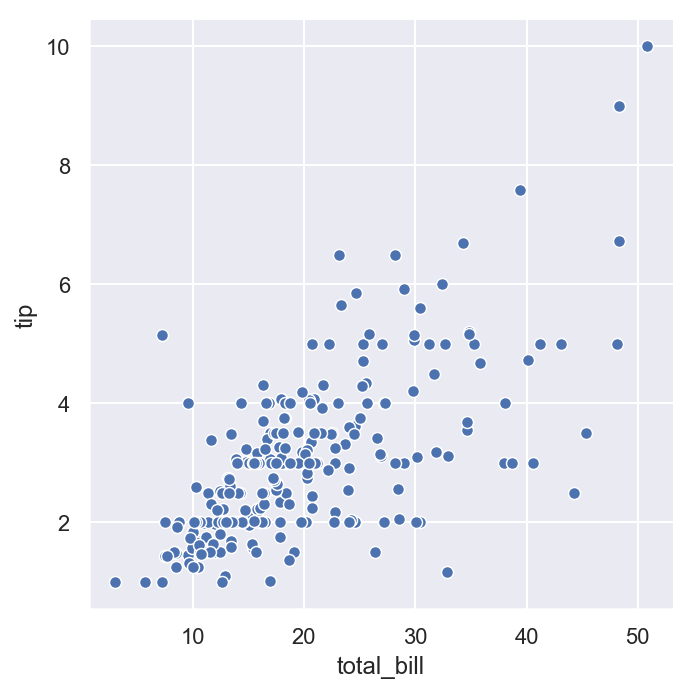

In [28]:
sns.relplot(x="total_bill", y="tip", data=tips);

## 不同分类不同颜色

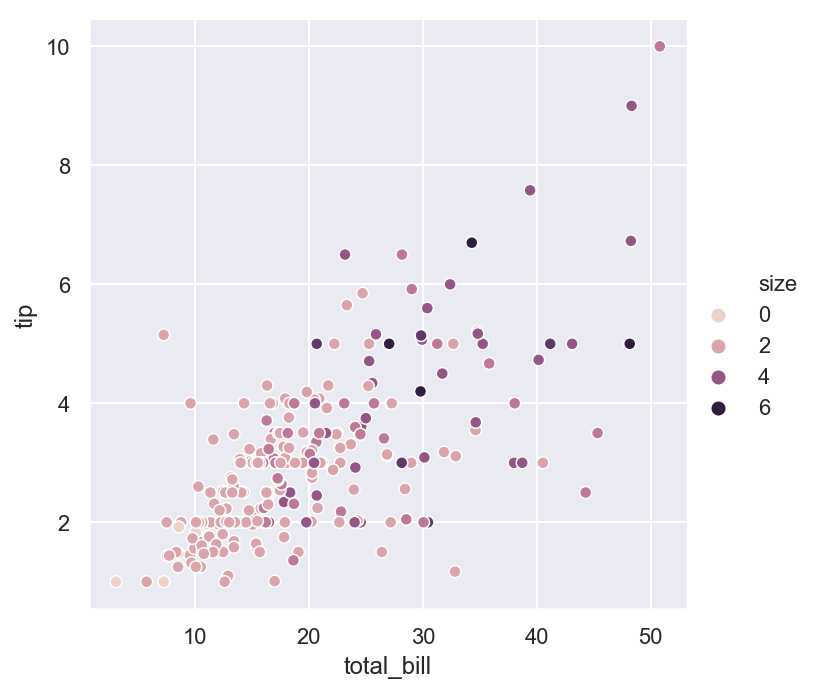

In [20]:
# 不同分类不同颜色
# 
'''
在上边这个例子中，hue参数对应的变量是分类型数据，因此seaborn自动为它应用了默认的定性
(分类)调色板。如果hue参数对应的变量是数值型的(可转化为浮点数的)，那么默认的颜色也会随之
变为连续的定量调色板。
'''
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

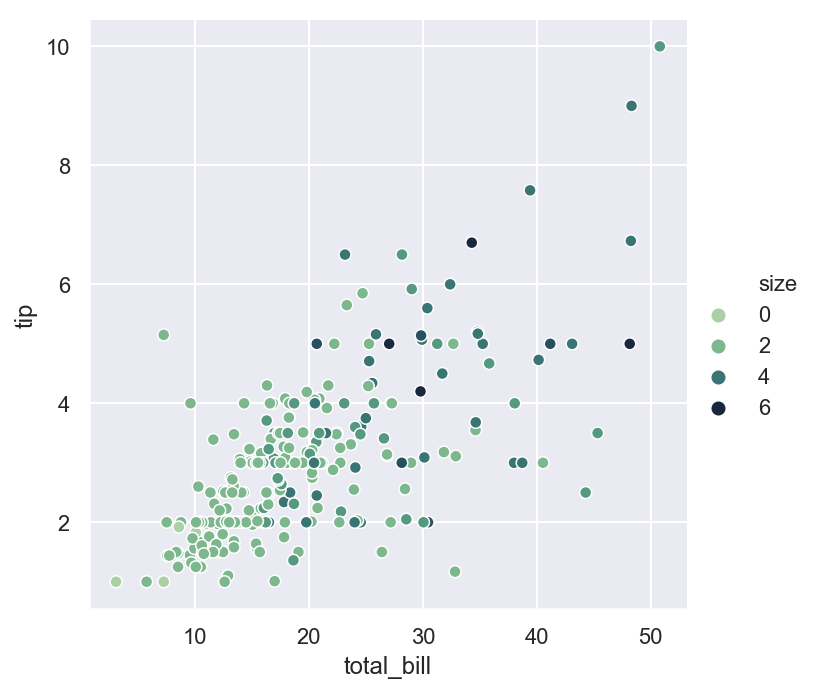

In [27]:
# 使用cubehelix_palette()的字符串接口来定制我们的连续调色板
sns.relplot(x="total_bill", y="tip", hue="size", 
            palette="ch:r=-.5,l=.75", data=tips);

### 调色板

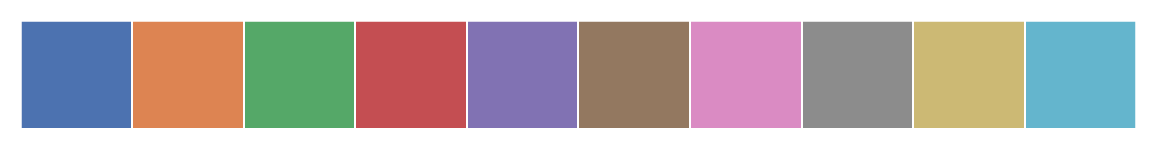

In [22]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

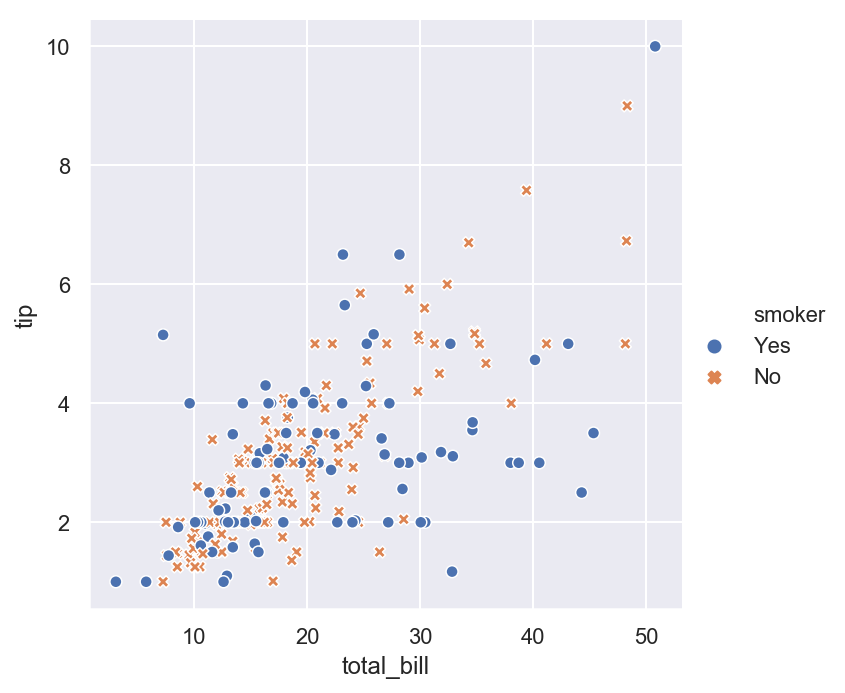

In [21]:
# 不同分类不同样式
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

### 控制点大小

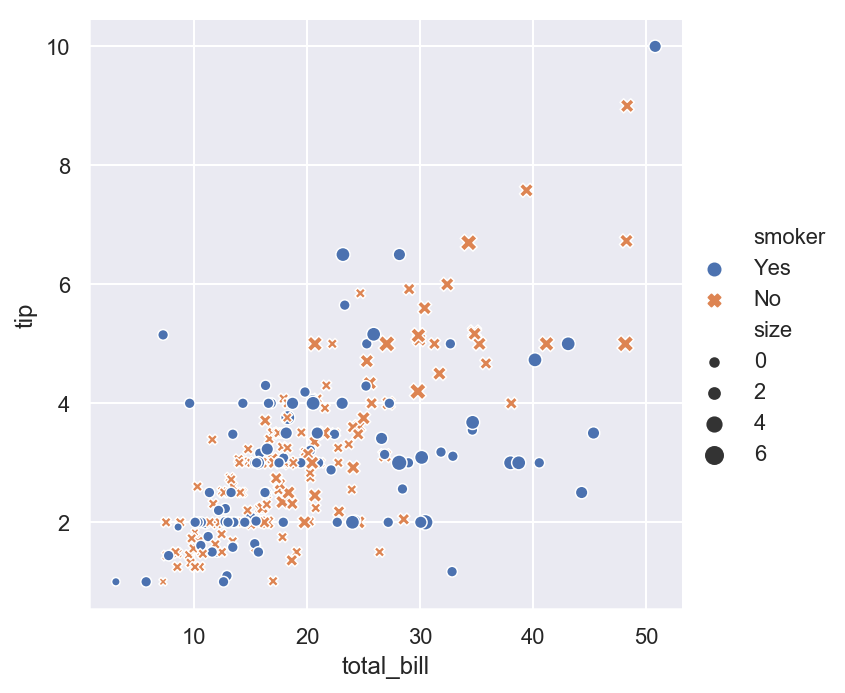

In [26]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",size='size',data=tips);

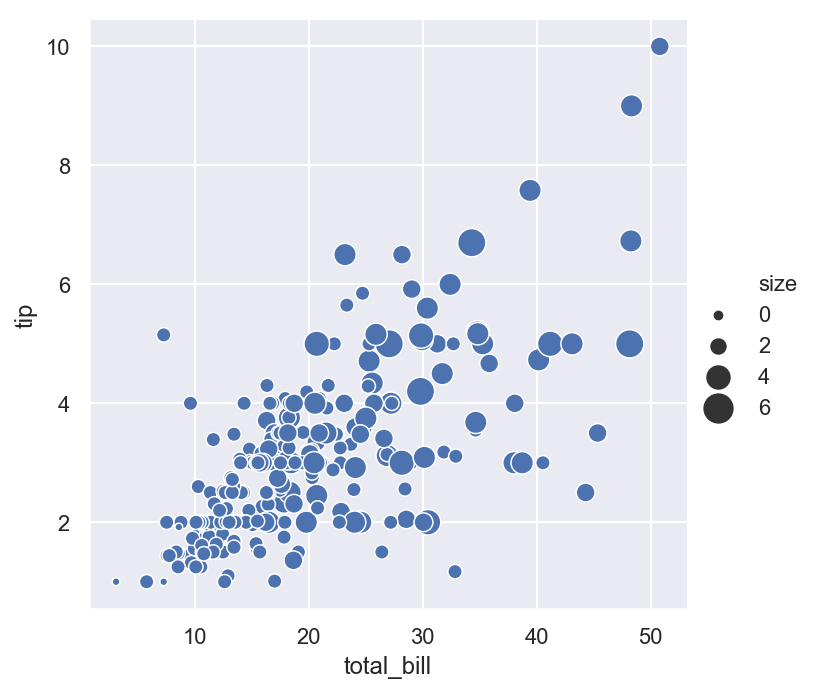

In [29]:
#
'''
与matplotlib.pyplot.scatter()不同的是，这里并不是使用原始数据中的数值来为每个点选择面积大小，
seaborn将原始数据归一化（正则化）到了某个范围，这个范围可以由我们来指定：
'''
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

## 折线图

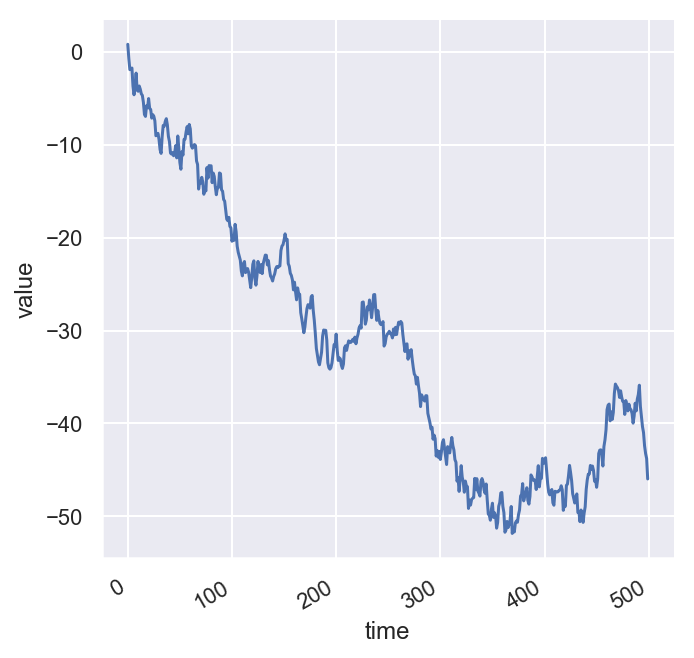

In [30]:
# 在seaborn中，我们可以通过lineplot()函数或者使用带有kind="line"参数的relplot()来实现线图的绘制。
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

###### 是否需要对x排序

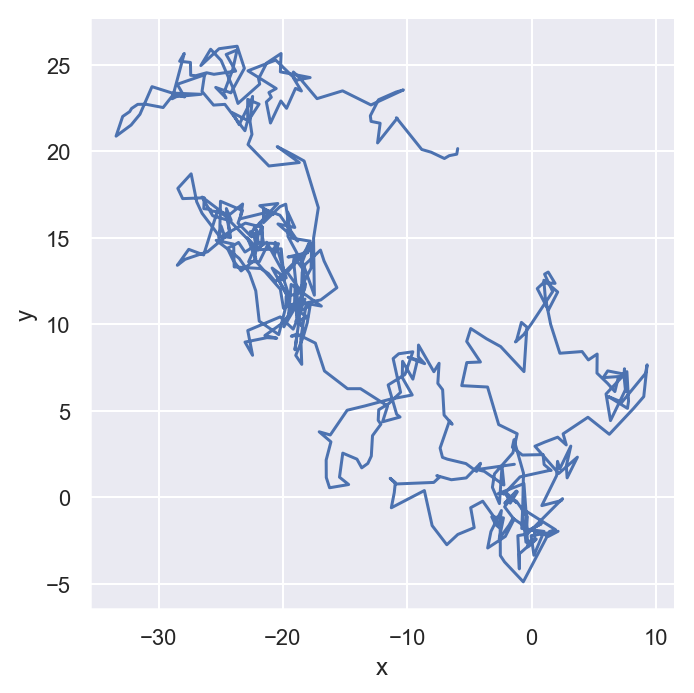

In [31]:
#
'''
由于lineplot()假设用户在大多数情况下是在尝试描绘y相对于x的函数（变化规律），
因此它在绘制之前会默认先对x做一个排序。不过我们可以禁止它。
'''
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

###### 聚合并展示不确定性
对于有一个x对应多个y值得时候

In [35]:
fmri = sns.load_dataset("fmri",cache=True,data_home="~/work/github/ml-demo/demo_data/sns/")

In [43]:
fmri.head(10)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557

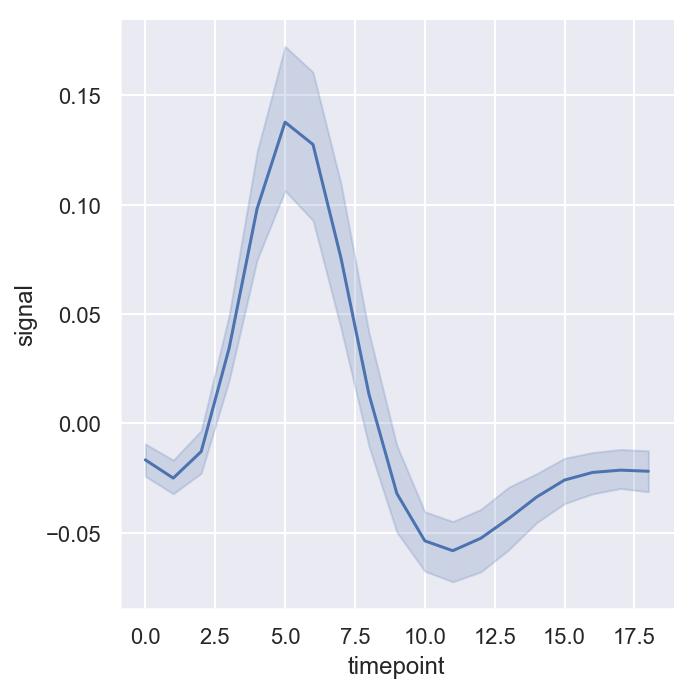

In [37]:
# seaborn会默认将多个观测值聚合起来，并且将它们的均值以及95%的置信区间展示出来：
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

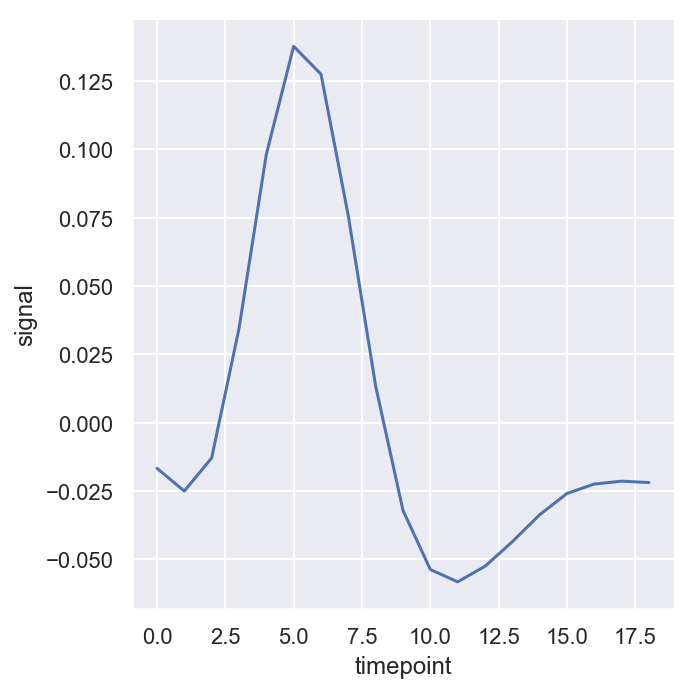

In [38]:
#
'''
置信区间是通过自助采样法（bootstrapping）计算的，这在遇到大型数据集时可以帮助我们节省时间。
当然，我们也可以禁止它。ci=None
'''
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

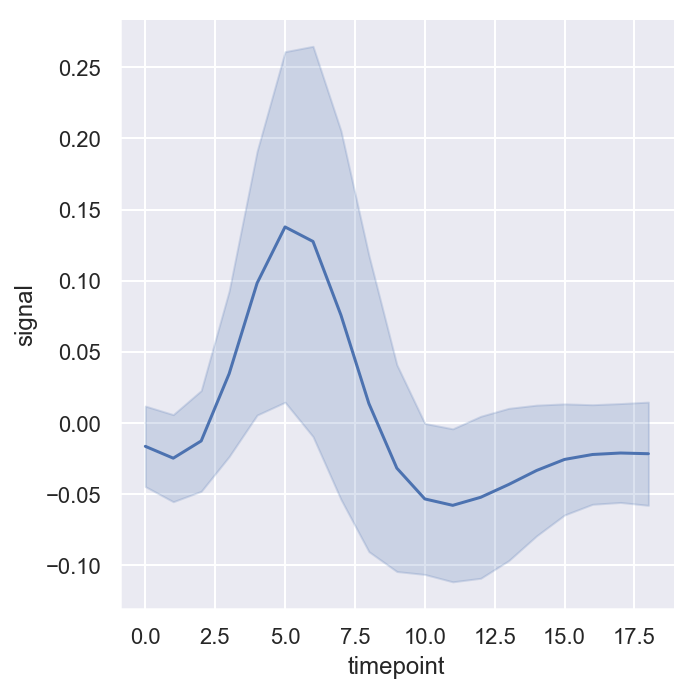

In [39]:
#
'''
另一个不错的选择是，我们可以用标准差替代置信区间来展示每个时间点下观测值的分布，
当数据集比较大时这一选择尤其明智。
'''
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

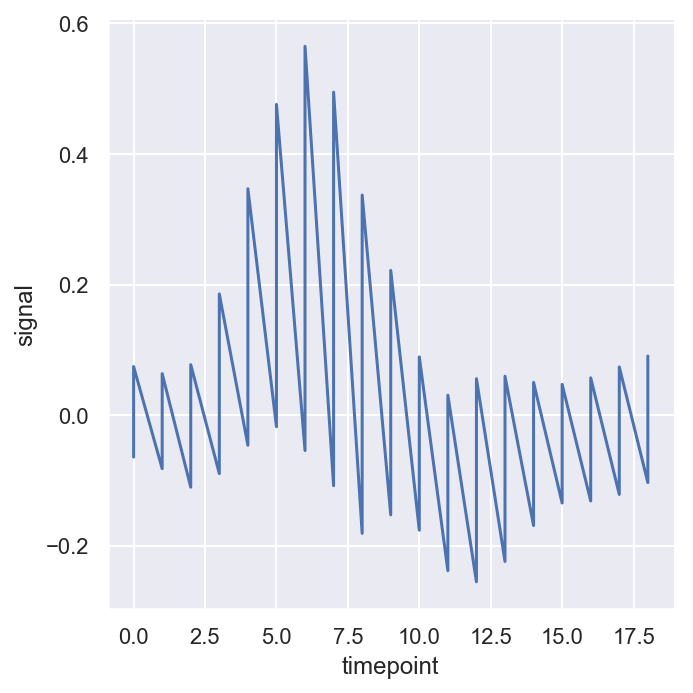

In [40]:
# 
'''
如果想要关闭所有的聚合操作，我们可以设置estimator=None。不过当同一时间点存在多个观测值时，
我们的图会看起来有些奇怪。
'''
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

###### 通过参数映射可视化数据子集
lineplot()与scatterplot()一样具有很强的灵活性：它也可以通过hue、size和style参数来展示额外的三个变量。它和scatterplot()使用了相同的API，因此我们不需要停下来绞尽脑汁地思考哪些参数是用来控制线条、哪些参数是用来控制散点。

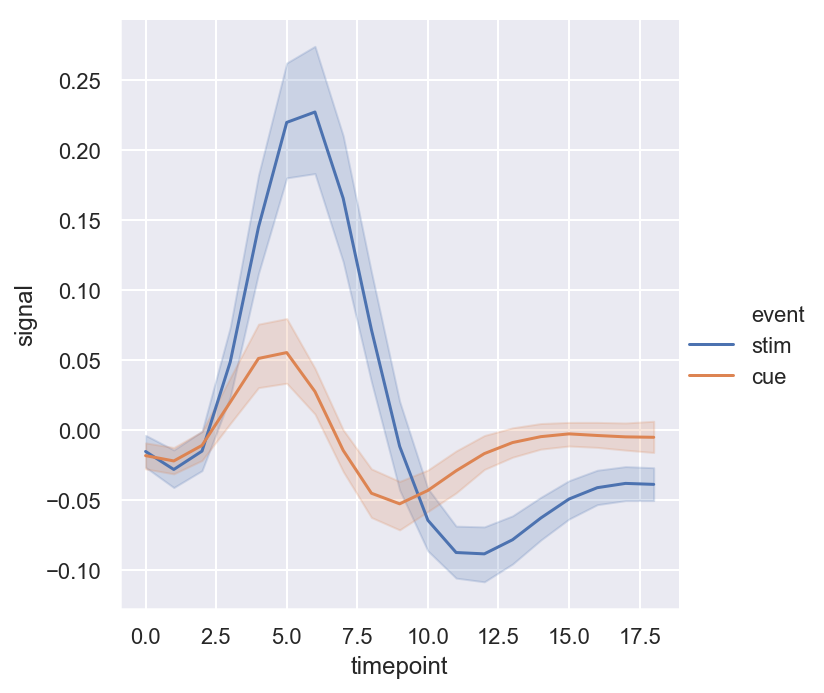

In [41]:
# 增加一个具有两个水平的分类变量作为hue参数，会将我们的图形分为两条线以及两个误差带，
# 并分别施以不同的颜色来区分数据的分类归属。
sns.relplot(x="timepoint", y="signal", hue="event", 
            kind="line", data=fmri);

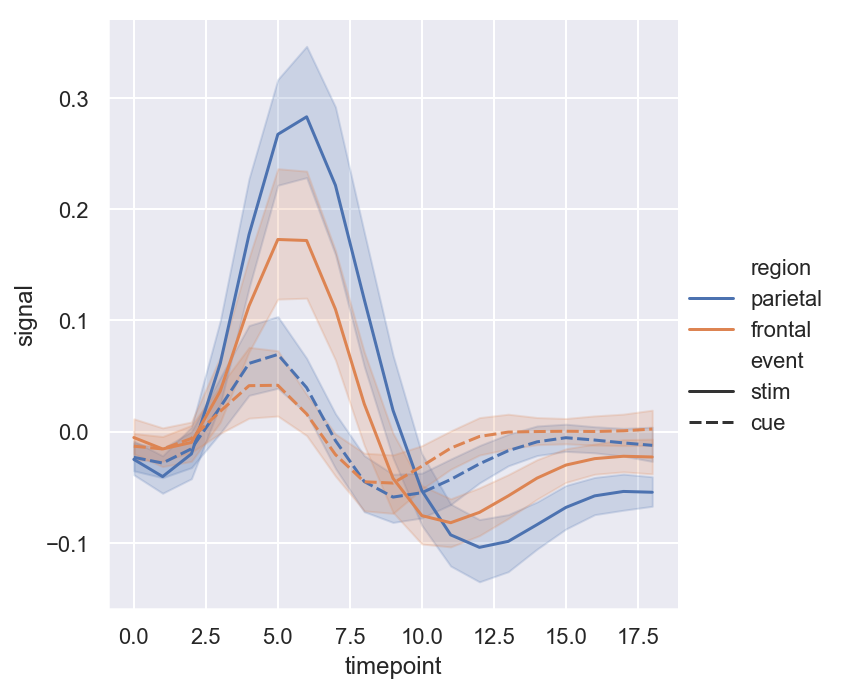

In [42]:
# 增加一个style参数，以不同的线条样式来展示不同的分类：
sns.relplot(x="timepoint", y="signal",  hue="region",  
            style="event", kind="line", data=fmri);

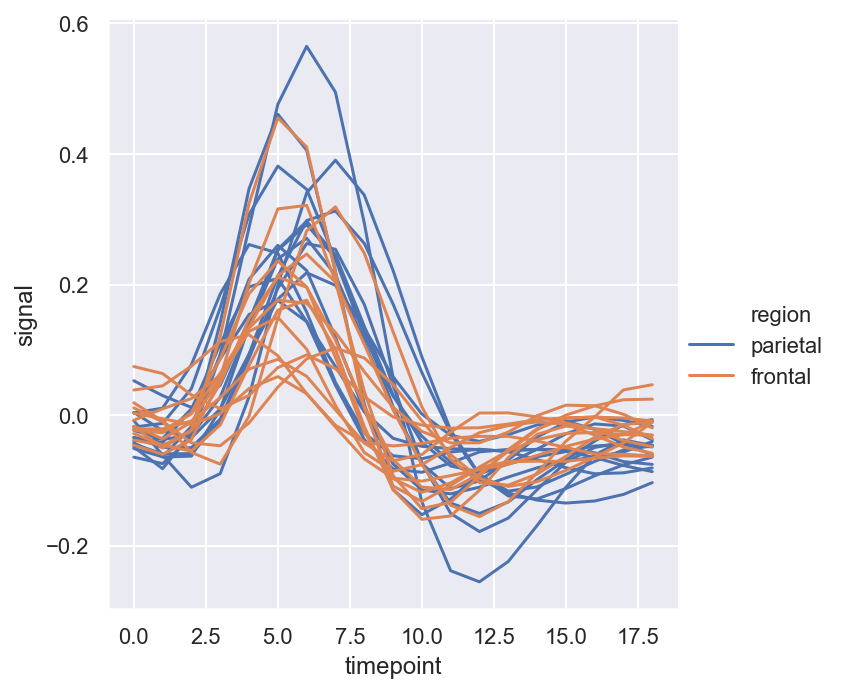

In [44]:
#
'''
当我们需要应对重复测量的数据时，我们可以将不同的抽样单元（单次实验观测到的数据系列）
分离开来展示，这并不需要我们使用一个语义参数(hue/style/size)。
后者会导致图例看起来像一个灾难（想象一下几十个分类的情况）:
'''
sns.relplot(x="timepoint", y="signal",  hue="region", 
            units="subject", estimator=None, kind="line", 
            data=fmri.query("event == 'stim'"));

In [46]:
dots = sns.load_dataset("dots",cache=True,data_home="~/work/github/ml-demo/demo_data/sns/").query("align == 'dots'")

In [47]:
dots.head(10)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487
5  dots     T1   -80       51.2    34.987571
6  dots     T1   -60        0.0    32.868526
7  dots     T1   -60        3.2    35.119048
8  dots     T1   -60        6.4    34.841076
9  dots     T1   -60       12.8    35.648148

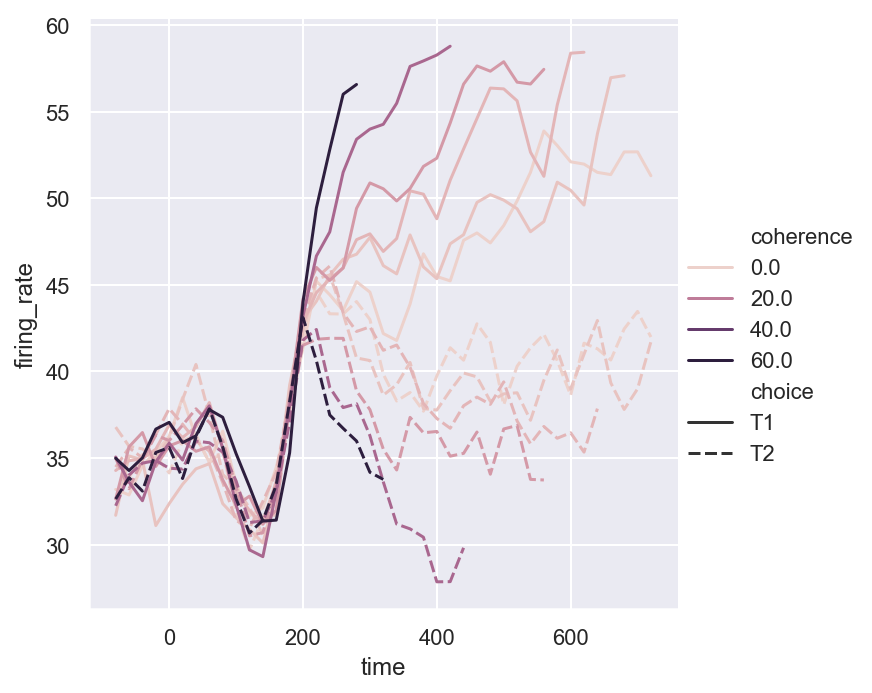

In [48]:
#
'''
与scatterplot()类似，lineplot()默认的调色板以及图例处理方式也
取决于hue对应的数据是分类型还是连续数值型。
'''
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

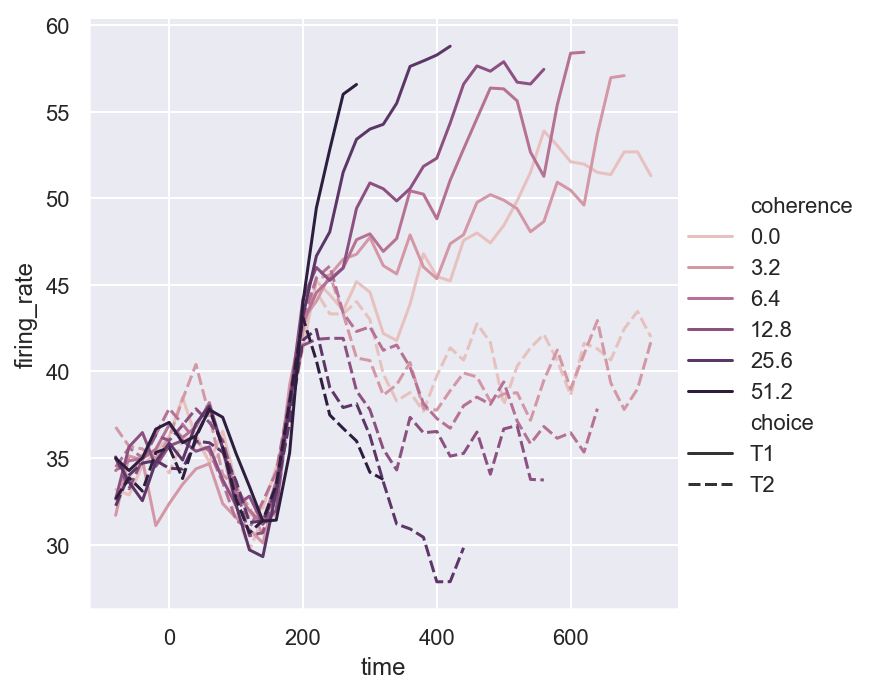

In [49]:
#
'''
当hue参数对应的变量的数据是均匀分布在对数刻度上的（即数据分布范围非常大，比如从1到1亿），
即使是连续的调色板也无法很好地应对这种情况。
但是我们可以使用列表或者字典对每条线指定一个颜色。
'''
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

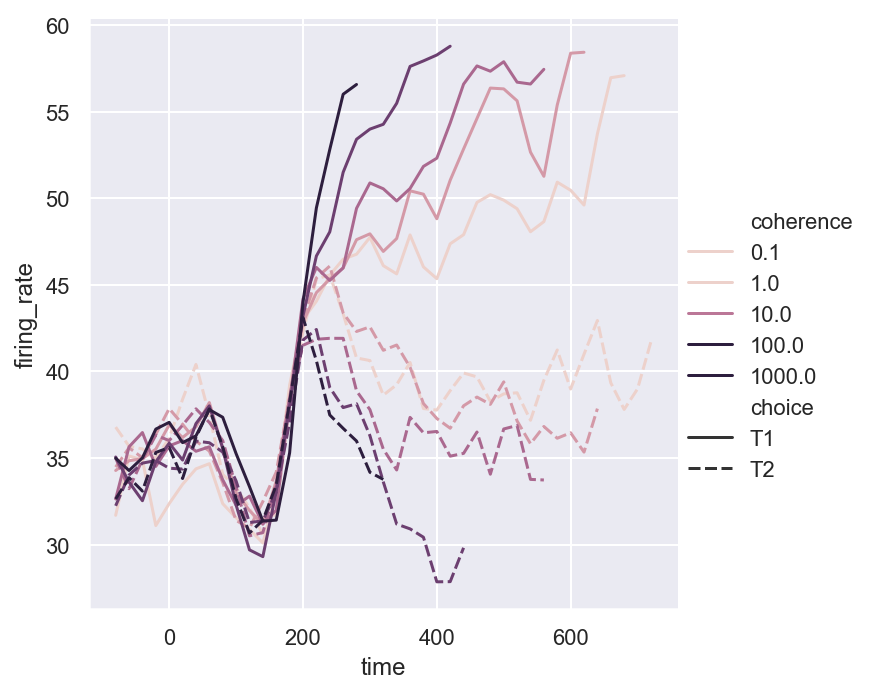

In [50]:
#或者我们可以直接修改调色板数值的正则方式：
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice",
            hue_norm=LogNorm(), kind="line", data=dots);

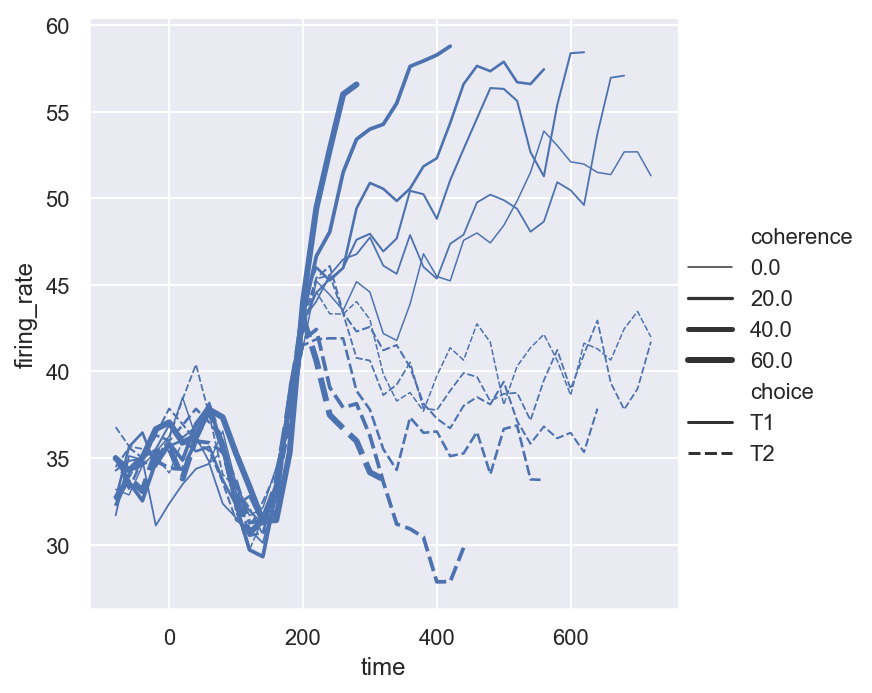

In [51]:
# 或者还有个size参数，它用来修改线条的宽度：
sns.relplot(x="time", y="firing_rate", size="coherence", 
            style="choice", kind="line", data=dots);


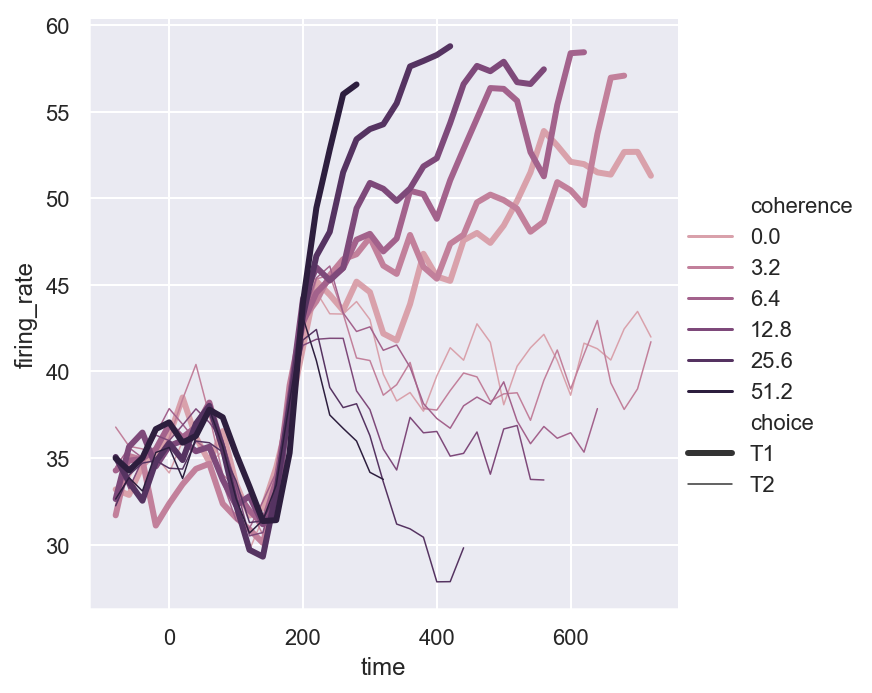

In [52]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

### 绘制时间序列数据

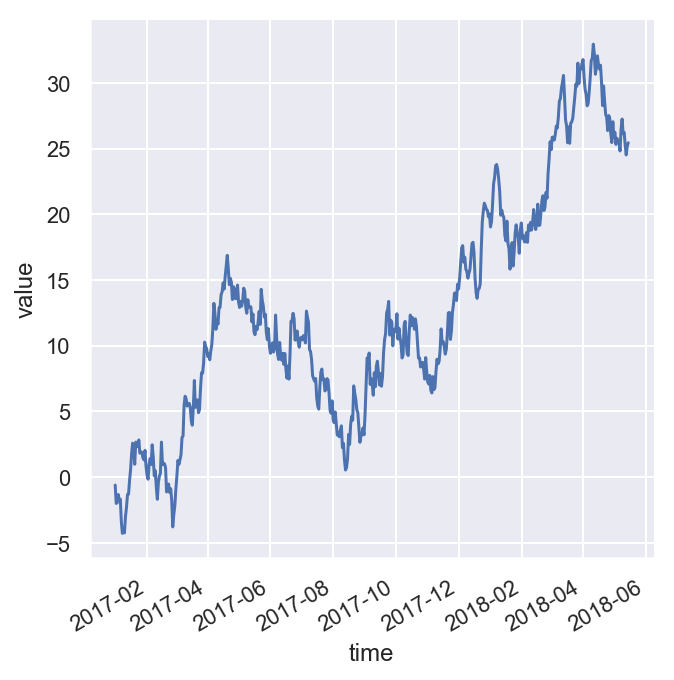

In [53]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## 子图展示

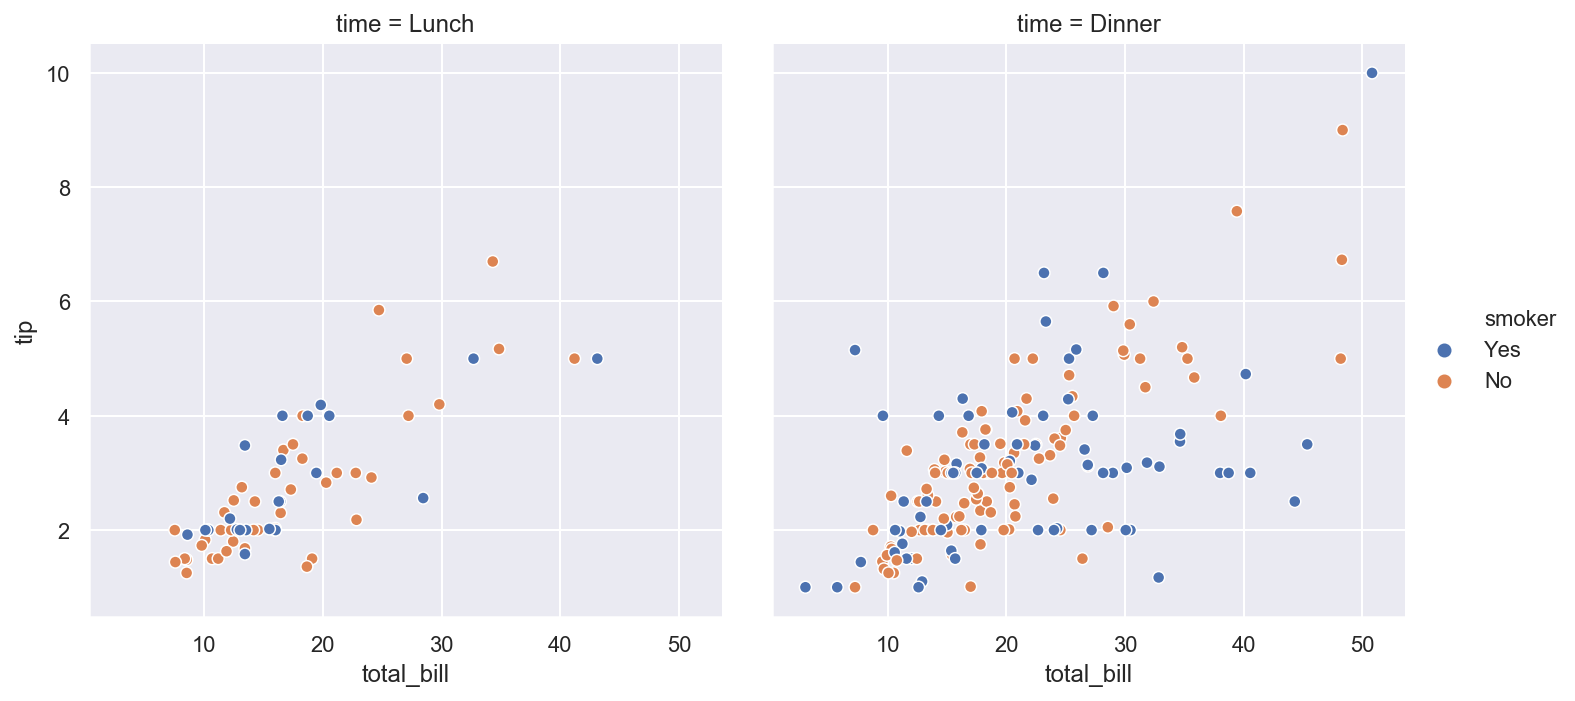

In [54]:
#这里控制对应列
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

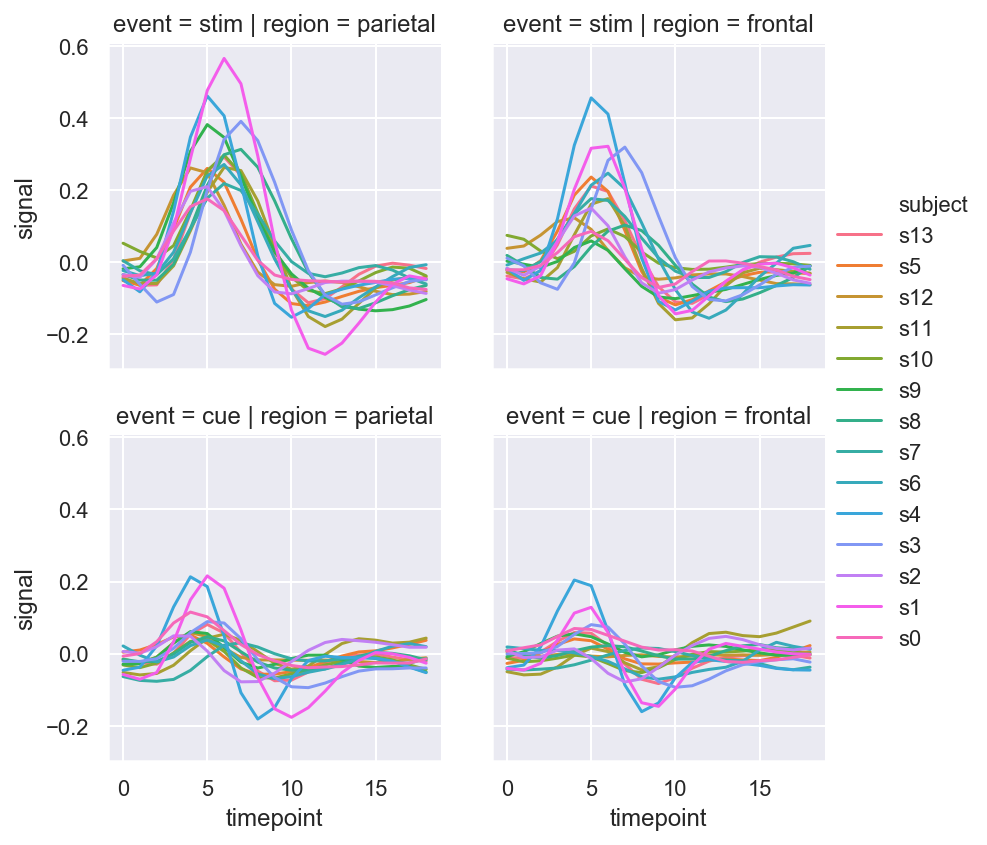

In [55]:
#
'''
可以同时使用col（列）和row（行）参数来展示两个变量的影响。当我们在图中增加了更多的变量时
（会有更多的子图），我们可能会想要调整图形的大小。要记住在FacetGrid中，
我们用height（子图高度）和aspect（高宽比）来定制每个子图的大小：
'''
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", 
            row="event", height=3, kind="line", estimator=None, data=fmri);

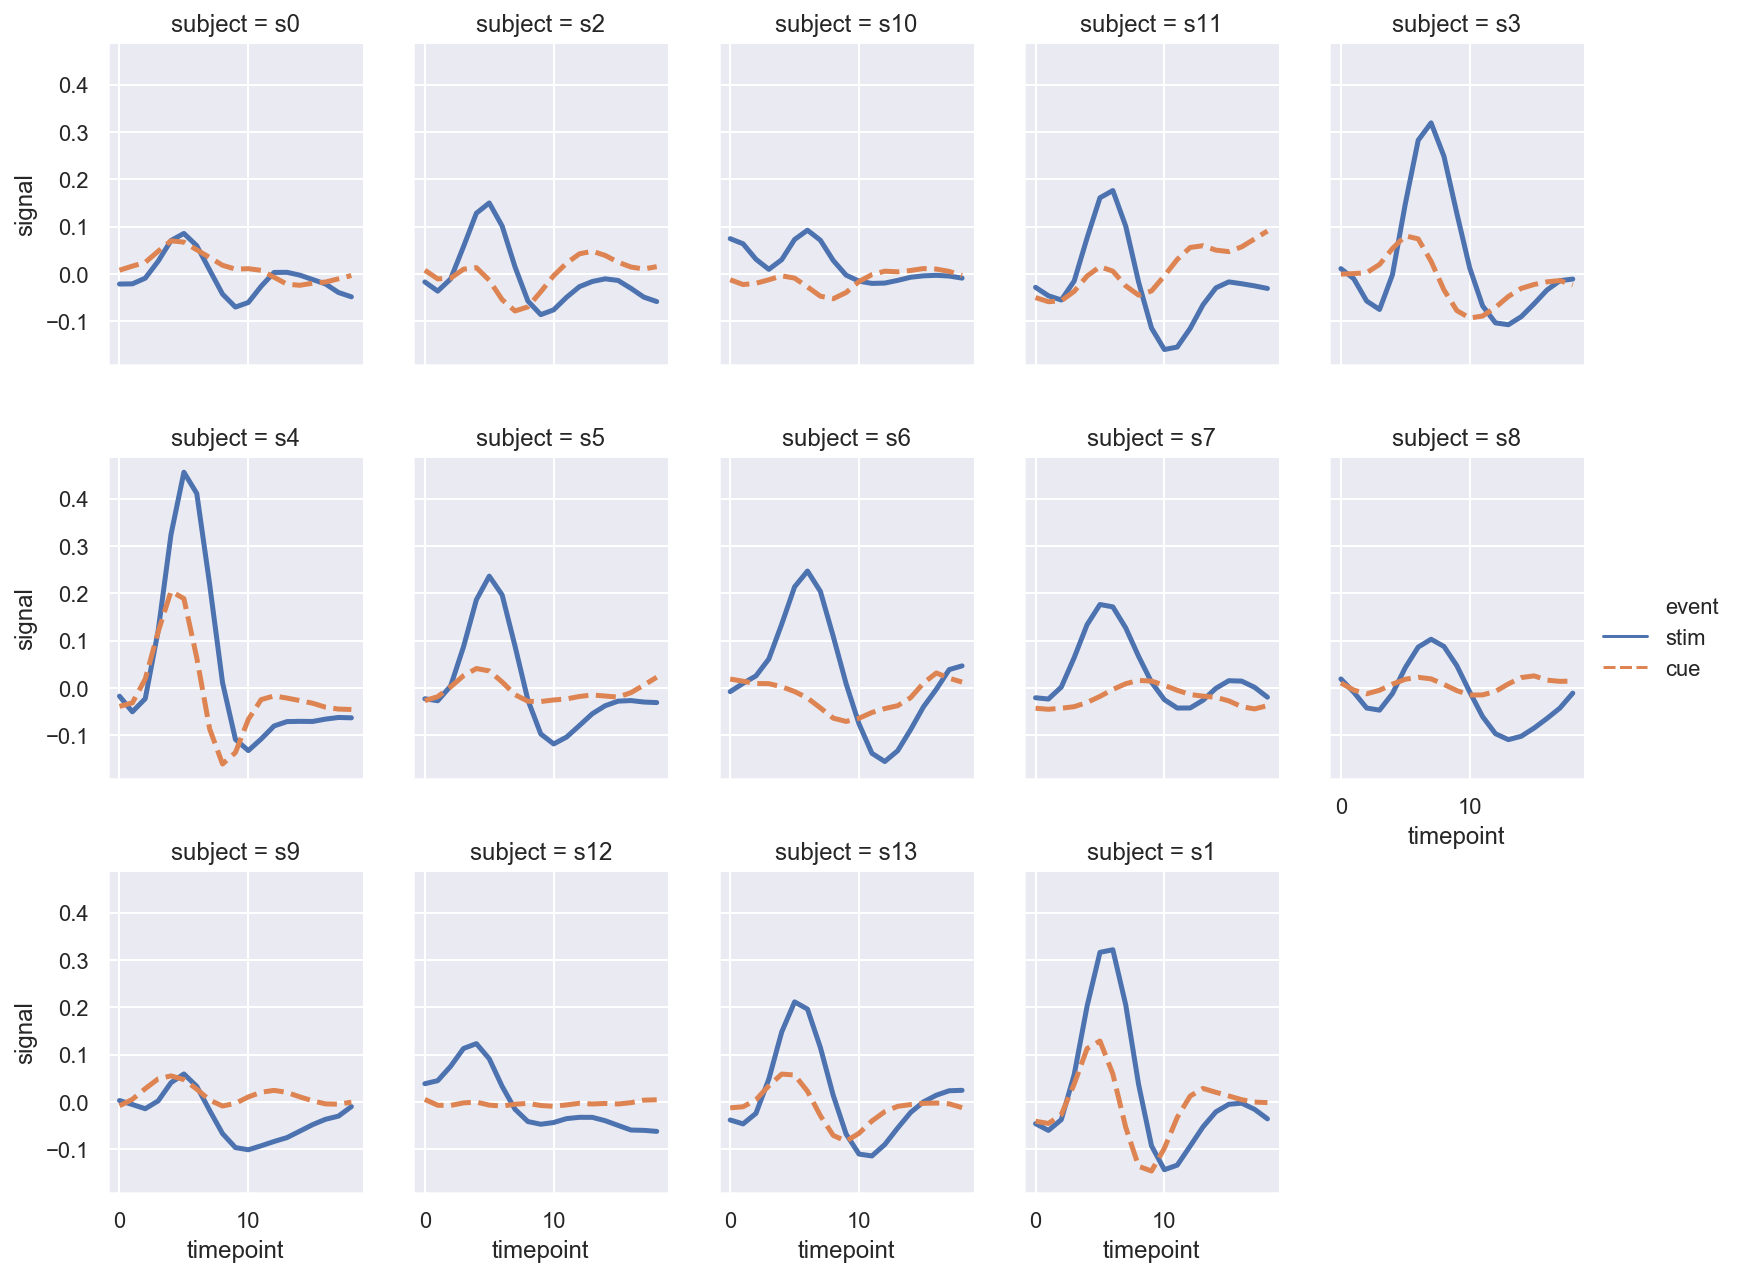

In [56]:
# 
'''
当我们想要检验某个具有大量水平的变量的影响时，我们可以将这个变量赋给col参数，
同时我们通过col_wrap参数设置每行达到多少列就换行：
'''
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

多幅简单的图通常比一幅复杂的图更加高效。

# 分类数据可视化
正如relplot()和scatterplot()/lineplot()之间的关系一样，我们可以使用catplot()函数来描述分类数据，也可以使用更多坐标轴级别的绘图函数来完成这些任务。catplot()提供了对这些axes-level的函数的整合，将他们放在了一个更高级别的统一的接口之中。
我们将分类可视化图形分为三类，并且之后我们会详细探讨他们：

* 分类散点图
    * stripplot(): 或catplot(kind="strip")
    * swarmplot(): 或catplot(kind="swarm")
* 分类分布图
    * boxplot(): 或catplot(kind="box")
    * violinplot(): 或catplot(kind="violin")
    * boxenplot(): 或catplot(kind="boxen")
* 分类统计估计图
    * pointplot(): 或catplot(kind="point")
    * barplot(): 或catplot(kind="bar")
    * countplot(): 或catplot(kind="count")

In [79]:
sns.set(style="ticks", color_codes=True)

## 分类散点图

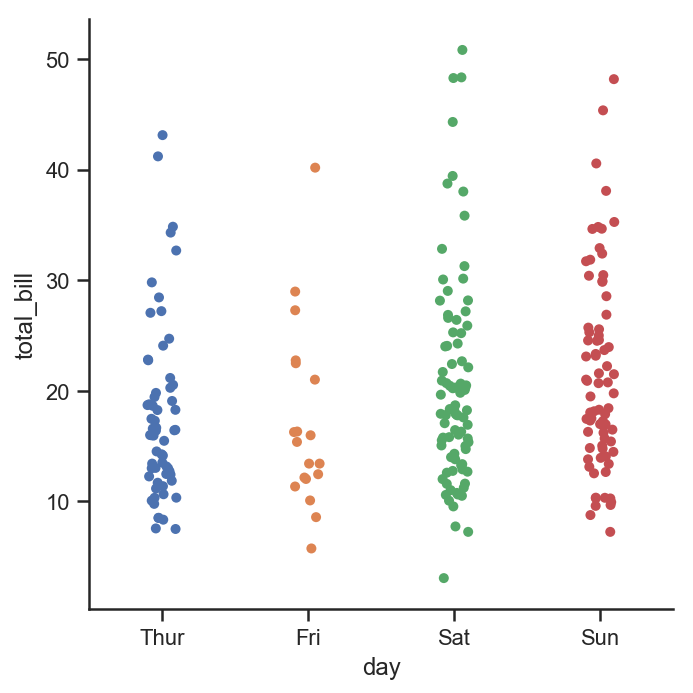

In [80]:
#
'''
catplot()默认的处理方式就是散点图。在绘制分类散点图时，我们会遇到一个挑战，
当在同一个类别中出现大量取值相同或接近的观测数据时，他们会挤到一起。
seaborn中有两种分类散点图，分别以不同的方式处理了这个问题。
catplot()使用的默认方式是stripplot()，它给这些散点增加了一些随机的偏移量：
'''
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

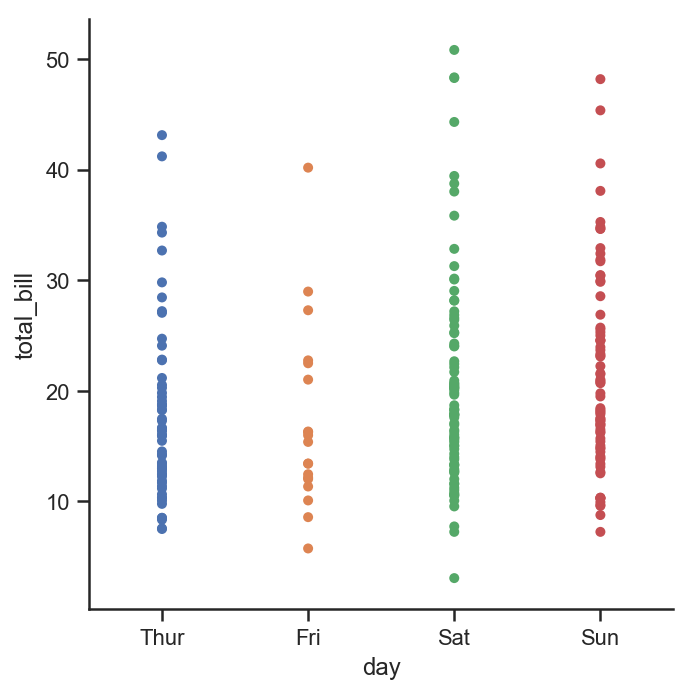

In [81]:
# jitter参数控制着偏移量的大小，或者我们可以直接禁止他们偏移：
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);


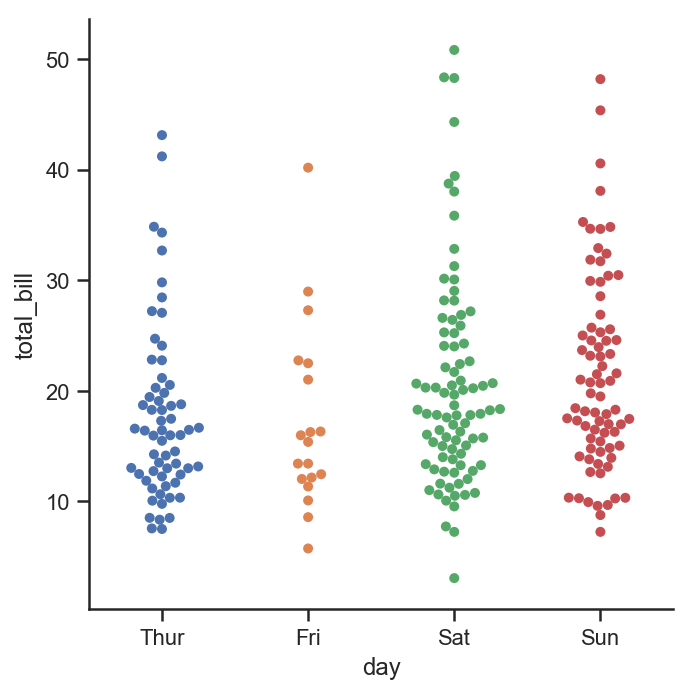

In [82]:
#
'''
第二种解决方式使用算法避免了散点之间的重合。它提供了更好的方式来呈现观测点的分布，
但是它仅适用于较小的数据集。这种图被叫做蜂群图，在seaborn中我们用swarmplot()或者
catplot(kind="swarm")来绘制它：
'''
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

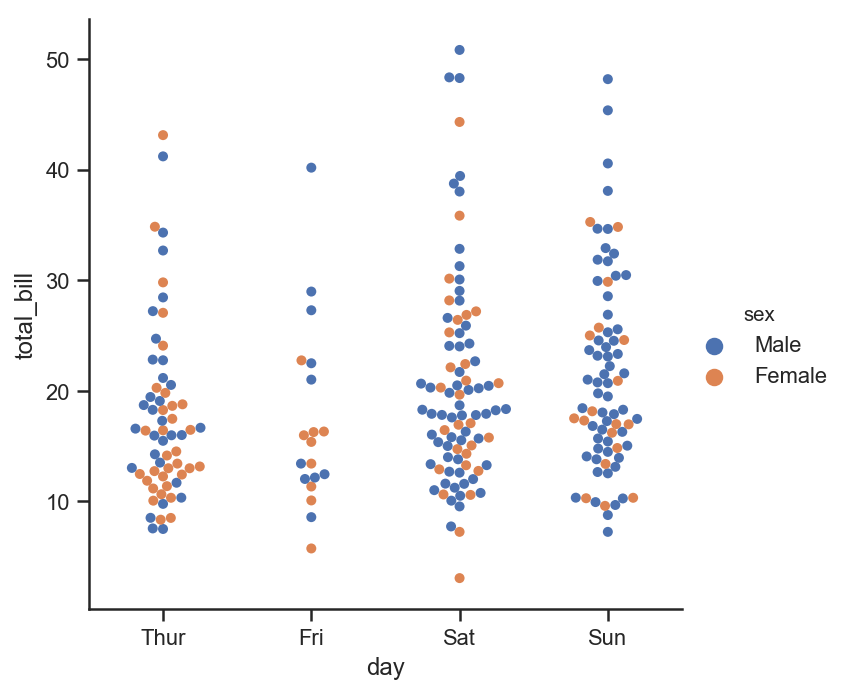

In [83]:
#
'''
与关系图(relplot())类似，我们也可以使用hue参数来增加一个新的维度（但是分类图不支持size和style）。
不同的分类图对于hue参数的处理不太一样，对于散点图而言，它仅仅控制散点的颜色就足够了：
'''
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

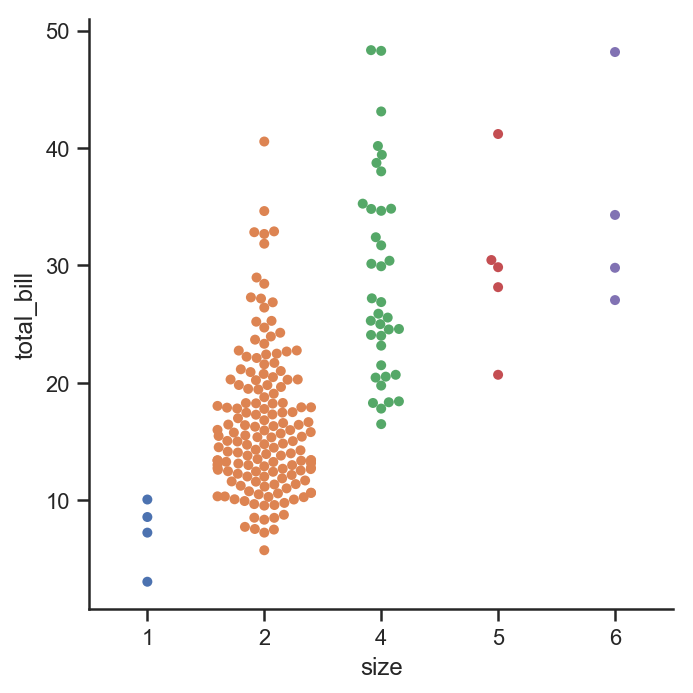

In [84]:
#
'''
与连续数值型数据不同，如何在坐标轴上对分类变量进行排序并不总是那么显而易见。
一般情况下，seaborn分类图函数会尝试推断数据集中分类的顺序。如果你的数据是pandas的
Categorical类型，那么默认的分类顺序可以在pandas中设置；
如果数据看起来是数值型的（比如1，2，3...），那他们也会被排序。
但是即使我们使用数字作为不同分类的标签，它们仍然是被当做分类型数据按顺序绘制在分类变量
对应的坐标轴上的：
'''
# 注意，2和4之间的距离与1和2之间的距离是一样的，它们是不同的分类，只会排序，但是并不会改变它们在坐标轴上的距离
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips.query("size != 3"));

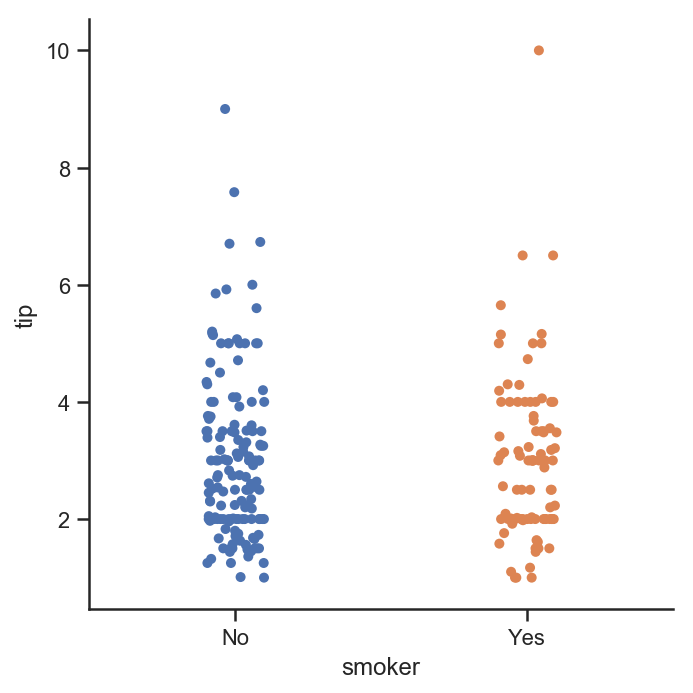

In [85]:
#我们还可以通过order参数指定分类的顺序，当我们需要绘制多个分类变量图时这一点会很重要：
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

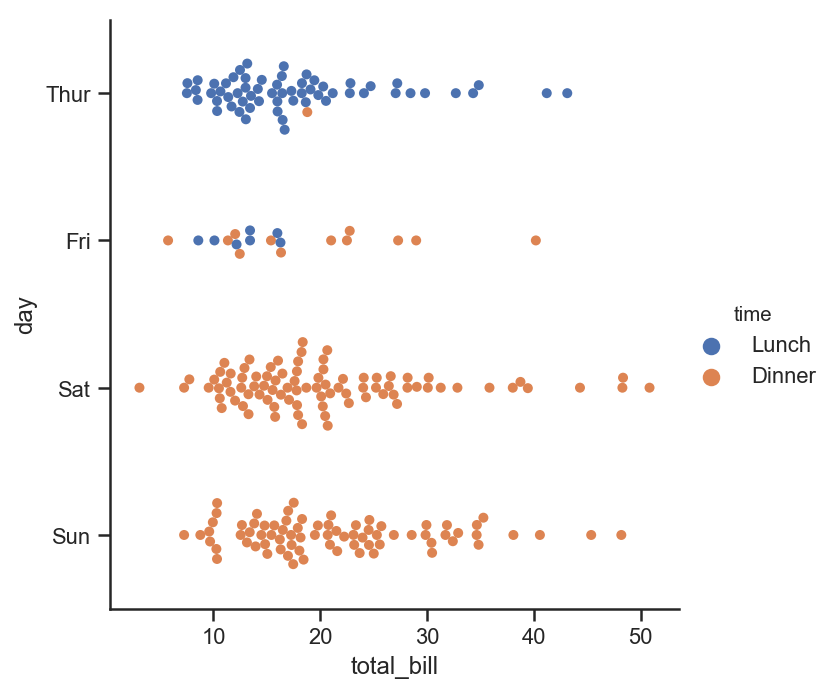

In [86]:
#
'''
我们前边涉及到过“分类坐标轴”，在这些例子中，我们的分类水平都与水平坐标轴绑定。
但是有些时候我们把分类变量放在垂直坐标轴上会更有帮助（尤其是当分类名称较长或者分类较多时）。我们只需要交换x和y分配的变量即可：
'''
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## 分类分布图
数据集大小越来越大，散点图就不好表征了。

### 箱线图

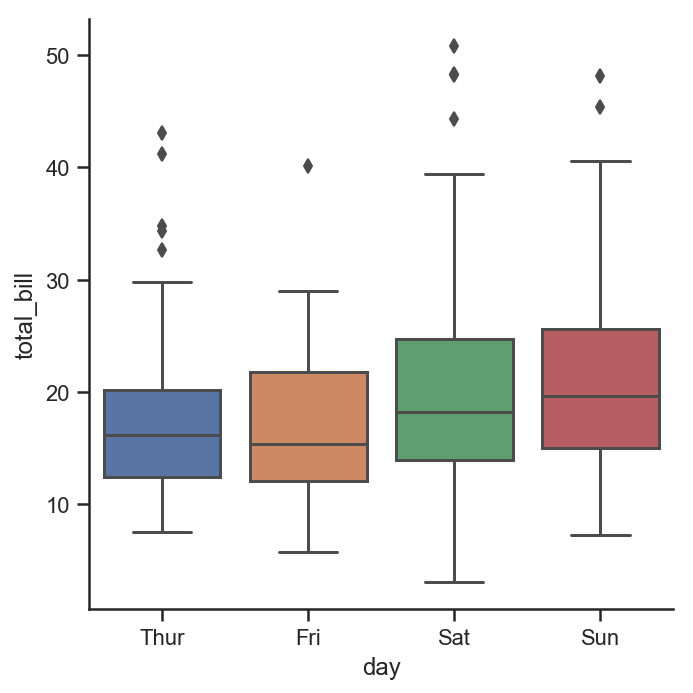

In [87]:
# 
'''
第一种就是我们的老朋友：箱线图。它能在图中展现出数据的上下四分位数、中位数以及一些极值。
箱体上下方的须线会分别向上和向下延伸1.5倍IQR（上下四分位数之间的距离），落在这个区域之外的
点会单独显示为离群点（异常值）。
'''
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

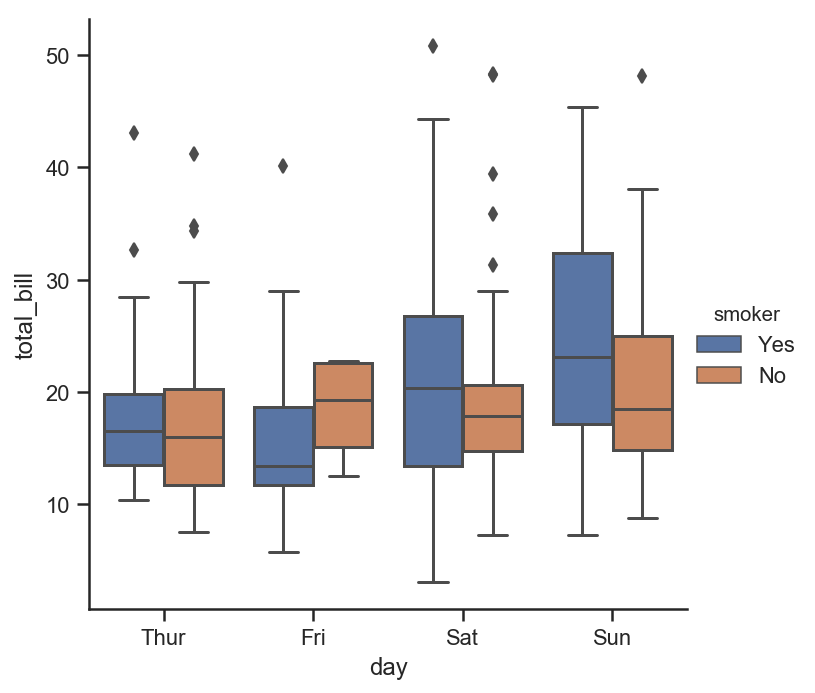

In [88]:
#我们可以增加一个hue参数，这样就可以进一步增加一个维度来观察数据分布：
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

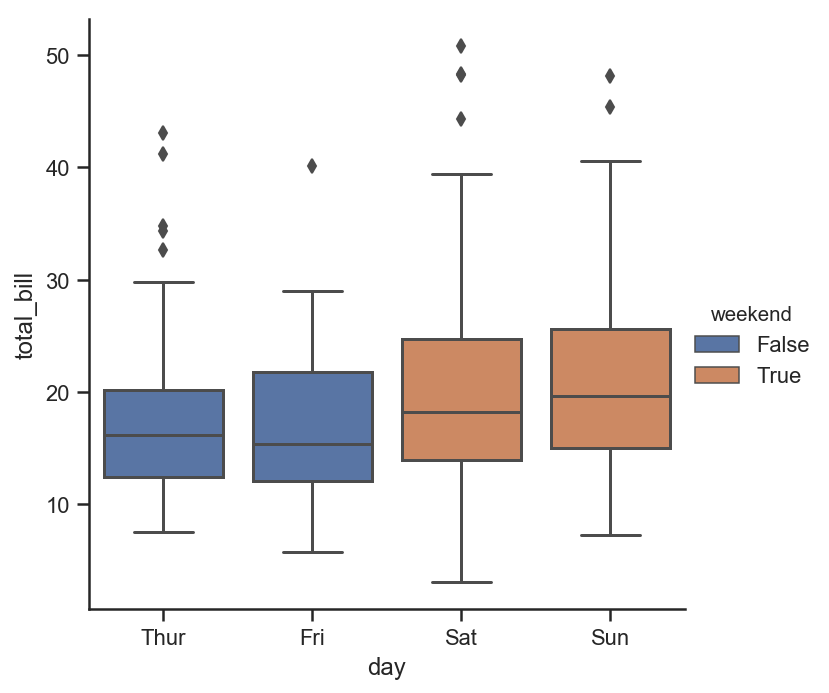

In [89]:
#
'''
这种操作叫做“dodging”，它会默认保持打开，因为它假设hue参数对应的变量与坐标轴上的分类变
量是相互嵌套的。假如事实并非如此，我们可以关闭“dodging”：
'''
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend", kind="box", dodge=False, data=tips);

In [90]:
diamonds = sns.load_dataset("diamonds",cache=True,data_home='/Users/zhen.huaz/work/github/ml-demo/demo_data/sns')

In [91]:
diamonds.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

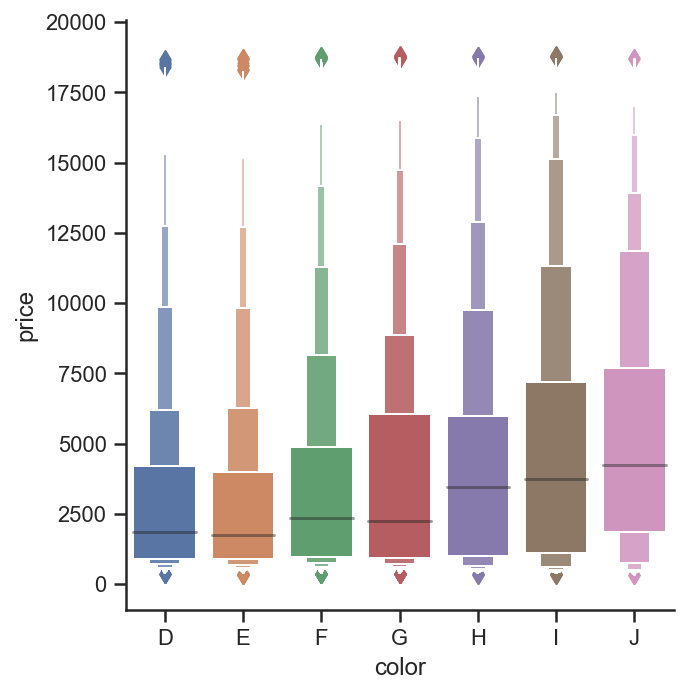

In [92]:
# boxenplot()是一个与boxplot()相关的函数，它绘制的是与箱线图相似但是能展示更多关于数据分布形状的信息，它对大数据更加友好：
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"));

### 小提琴图

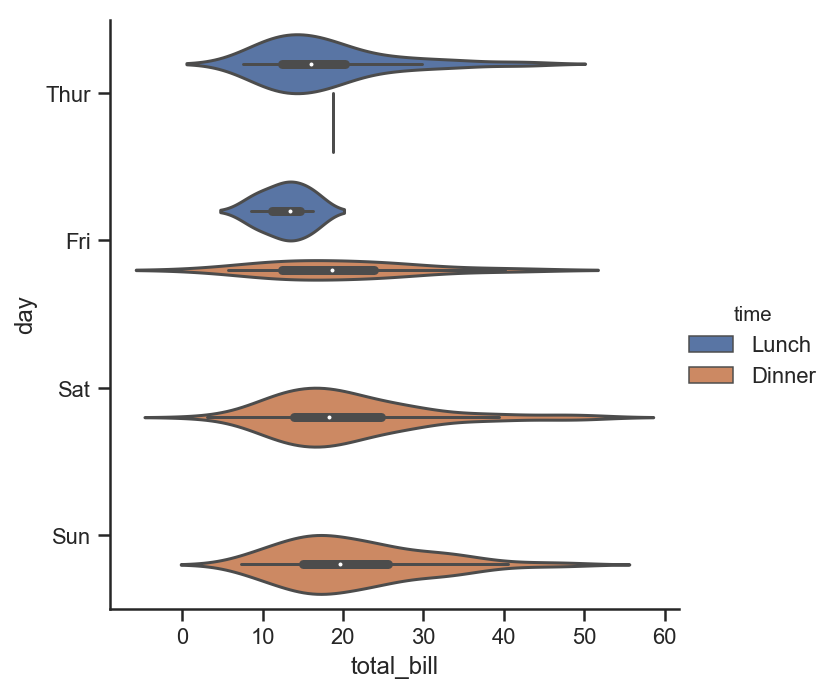

In [93]:
# 另一种方法是violinplot()，它将箱线图与核密度估计过程结合了起来：
sns.catplot(x="total_bill", y="day", hue="time", kind="violin", data=tips);

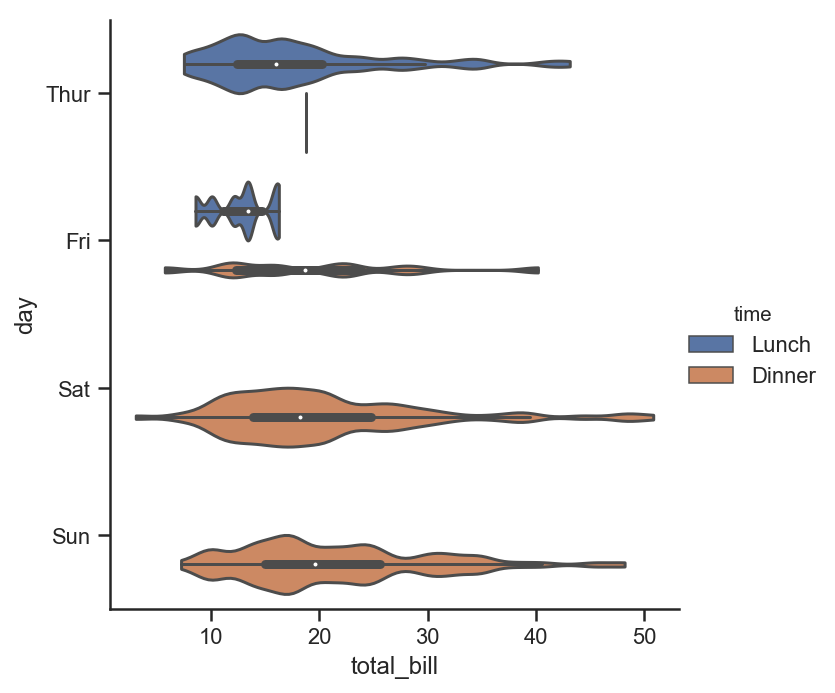

In [94]:
# 
'''
另外，箱线图中的分位数和须线也都在小提琴图中有所体现。但是由于小提琴图引入了KDE（核密度估计），所以相对于简单明了的箱线图，我们可能需要调整更多的参数。

'''
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0, data=tips);

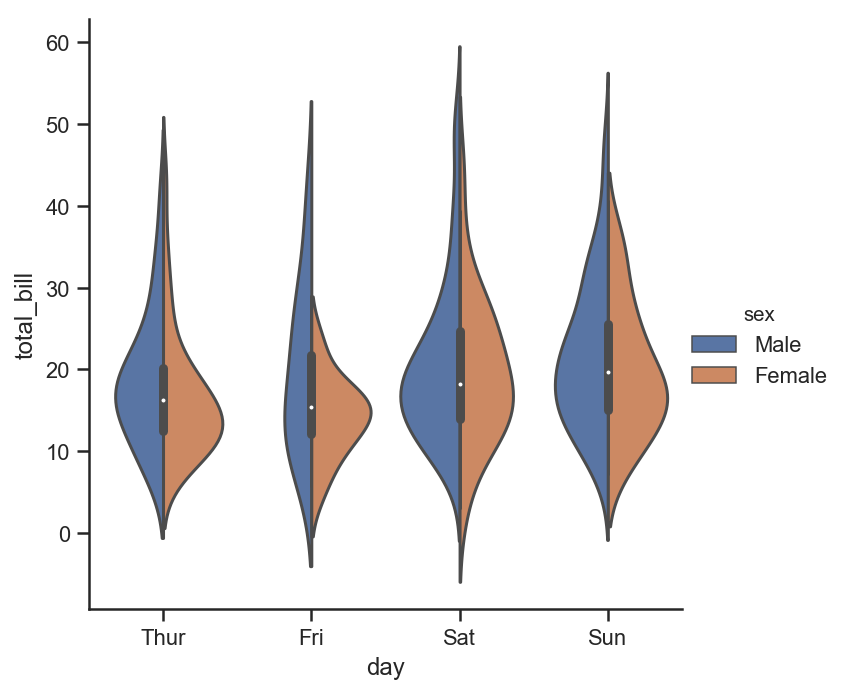

In [95]:
#
'''
当一个额外的分类变量仅有2个水平时，我们也可以将它赋给hue参数，并且设置split=True，
这样我们可以更加充分地利用空间来表达更多信息：
'''
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

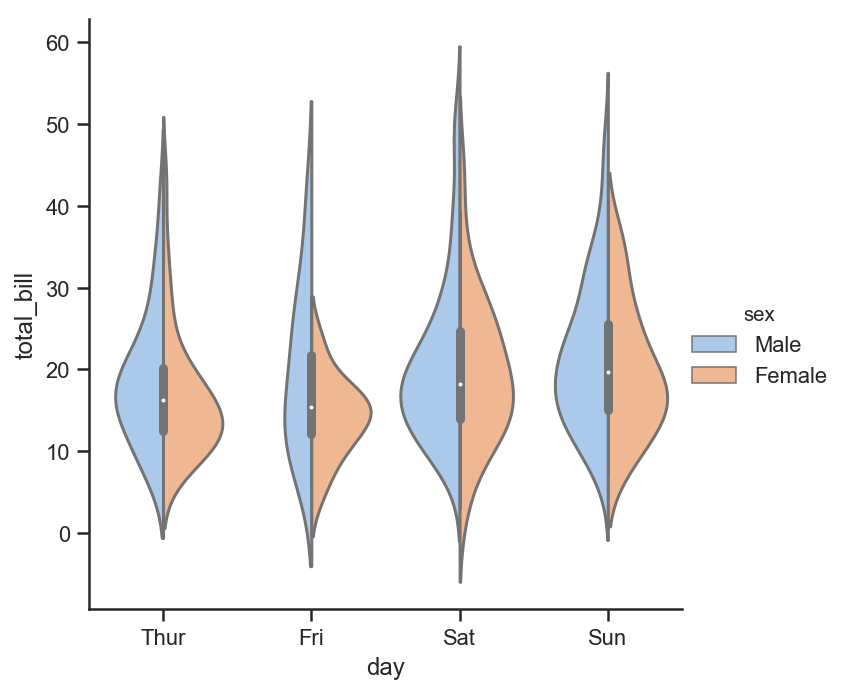

In [98]:
#在小提琴图中，我们有许多选项可以调整小提琴内部的内容，
#比如我们可以展示每个观测点的位置而非统计量：inner
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

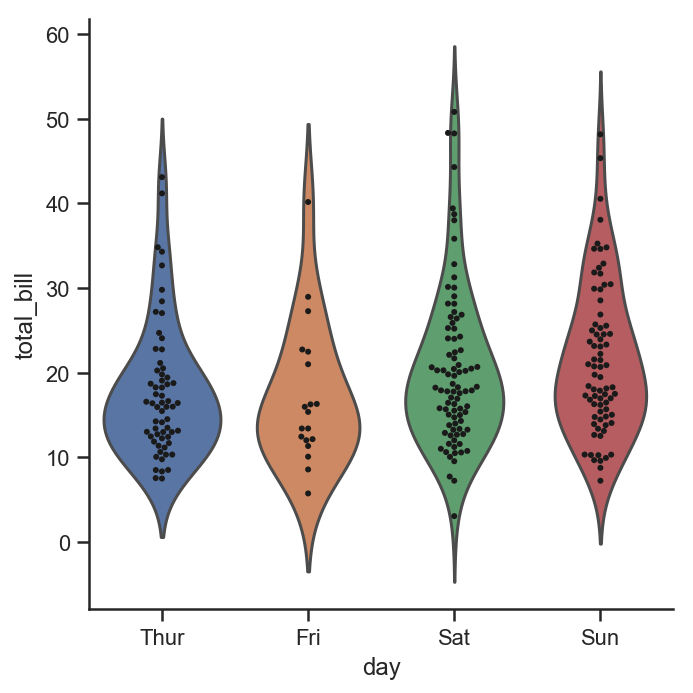

In [97]:
# 
'''
我们还可以将swarmplot()或stripplot()与箱线图或者小提琴图结合起来，
这样我们就可以同时看到每个观测值的分布以及关于分布形态的统计量情况（分位数、极值等）：
'''
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# 分类统计估计图
在某些应用场景中，相对于展示每个分类的数据分布，我们可能更想展示每个分类中数据的集中趋势估计（统计量，比如均值、中位数、方差等）。seaborn有两种方式来展示此类信息。需要知道的是，这些函数基本的API与前边提到的那些绘图函数是一致的。

## 条形图

In [99]:
titanic = sns.load_dataset("titanic",cache=True,data_home='/Users/zhen.huaz/work/github/ml-demo/demo_data/sns')

In [100]:
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

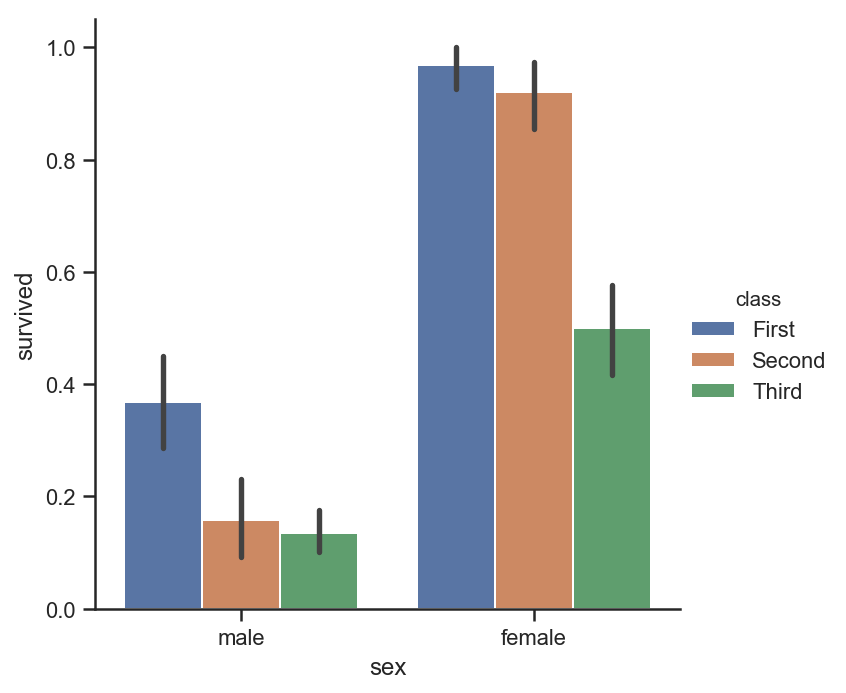

In [101]:
#
'''
一种常见的图形是条形图。在seaborn中，barplot()函数在整个数据集上运行，
并且应用一个函数来获得那些统计量（默认为均值）。当每个分类中有多个观测值时，
它还可以通过自助采样法计算出一个置信区间，并且通过误差棒的方式绘制出来。
'''
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

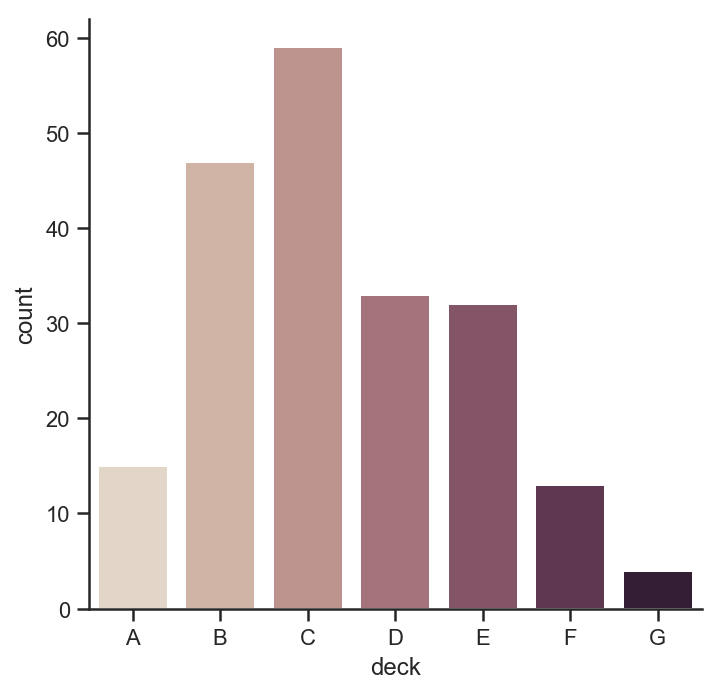

In [102]:
#
'''
一个特例是我们想要展示每个分类下观测值（样本）的数量而非统计量。
这就像是“属于分类变量而非连续变量的直方图”。在seaborn中，
我们可以使用countplot()轻易地达成目的：不设置y，使用count
'''
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

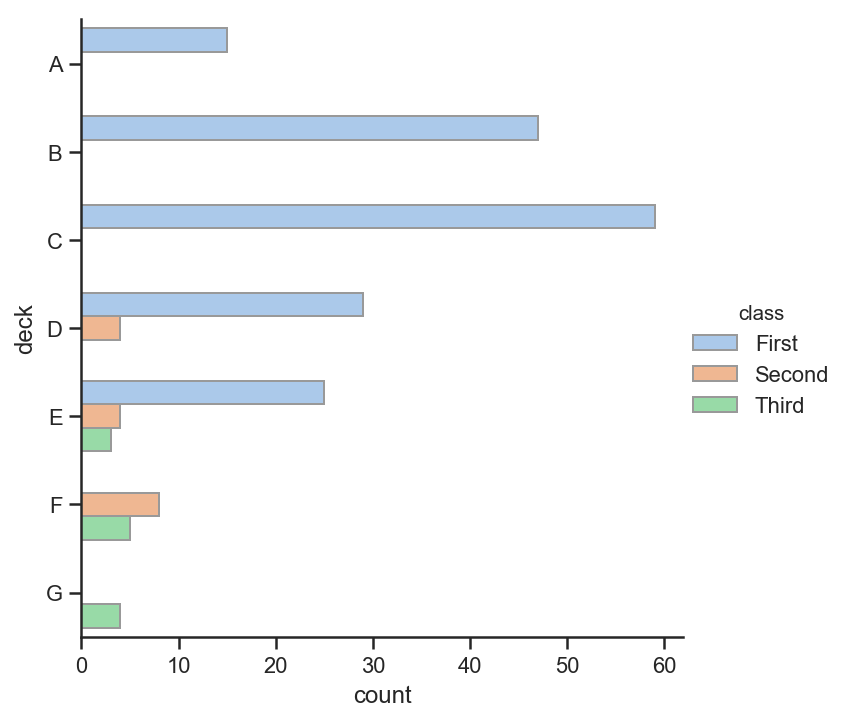

In [103]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

## 点图

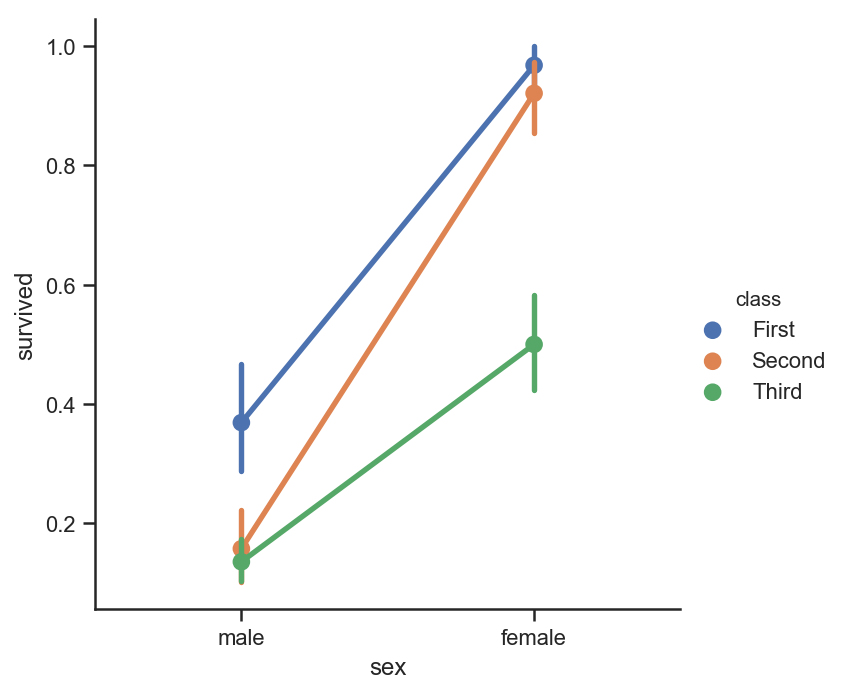

In [104]:
#
'''
可以使用pointplot()来表现同样的信息。点图也使用高度来编码统计量，但是区别在于它不会画出
一个完整的长条，而是用一个点以及置信区间来替代；另外，它还会将属于同一个hue分类的点连起来。
这样，我们就可以很容易看到hue变量是如何影响坐标轴上的分类变量的（交互作用），
因为不同线条的斜率简直是一目了然：
'''
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

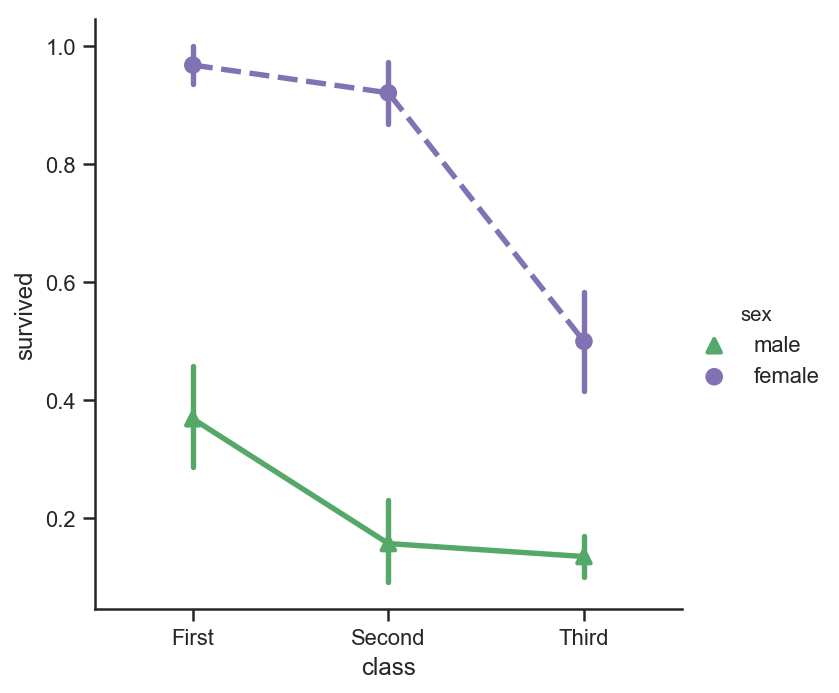

In [107]:
#
'''
我们前边提到，分类绘图函数是没有style这一参数的（在relplot()中有）。
但是我们同样可以修改线条和点的样式，使得我们的图片更有可读性，甚至可以在黑白色调下
表现分类信息（考虑到色盲读者时，黑白色调会很有帮助）：
'''
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

# 绘制“宽表”数据

In [108]:
iris = sns.load_dataset("iris",cache=True,data_home='/Users/zhen.huaz/work/github/ml-demo/demo_data/sns')

In [109]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

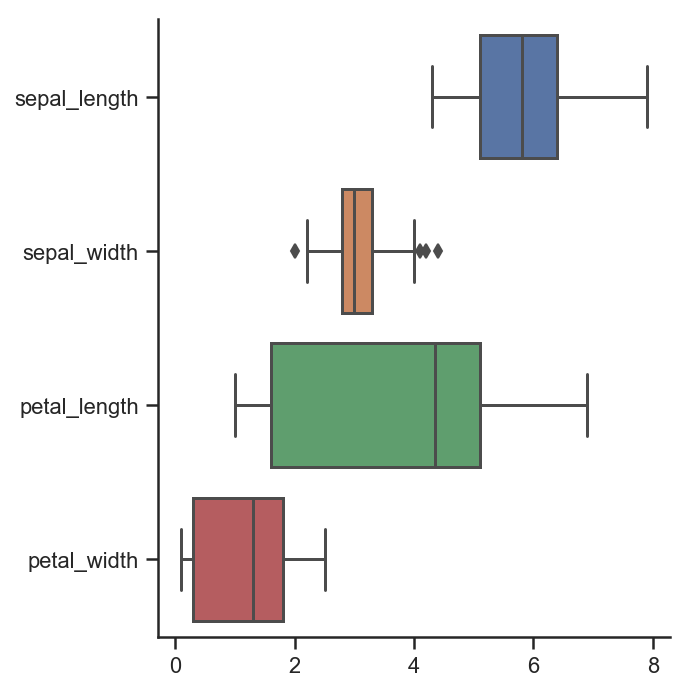

In [110]:
#
'''
虽然我们推荐使用使用长数据或者整齐的数据（类似一维数组），
但是宽表类的数据在seaborn中也是得到了支持的。宽表类数据是指二维的数据，
比如pandas的DataFrame或者numpy的二维数组。这些对象可以直接传递给data参数。
'''
sns.catplot(data=iris, orient="h", kind="box")

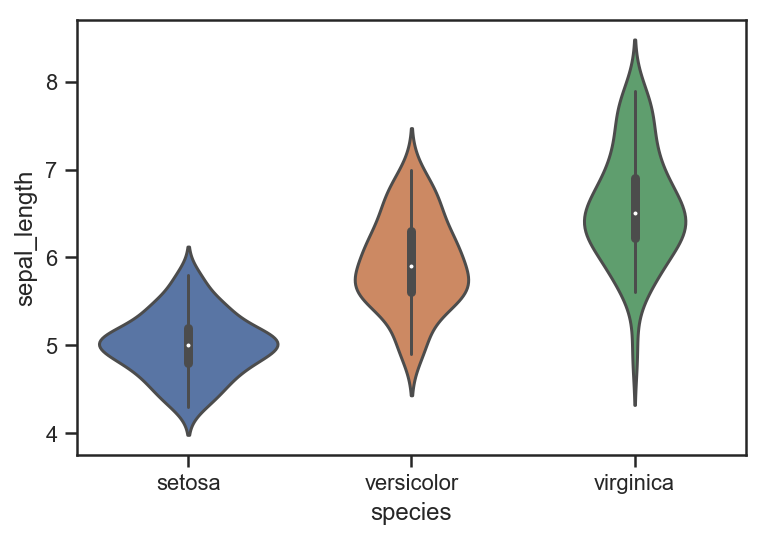

In [111]:
'''
另外，那些坐标轴级别的绘图函数（而非图形级别、整合后的API）可以接受类似向量的数据输入（
比如pandas的Series、numpy的一维数组）：
'''
sns.violinplot(x=iris.species, y=iris.sepal_length)

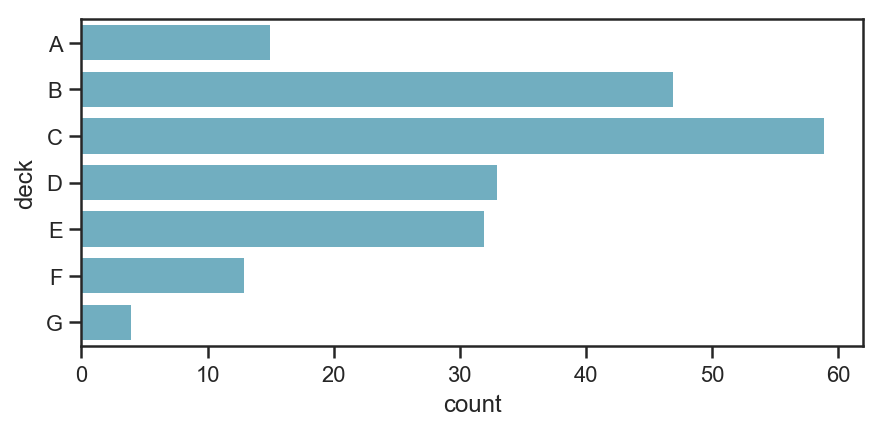

In [112]:
#想要控制上边我们讨论的图形的大小和形状，我们需要使用更底层的matplotlib设置项
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

## 使用子图展示多重关系

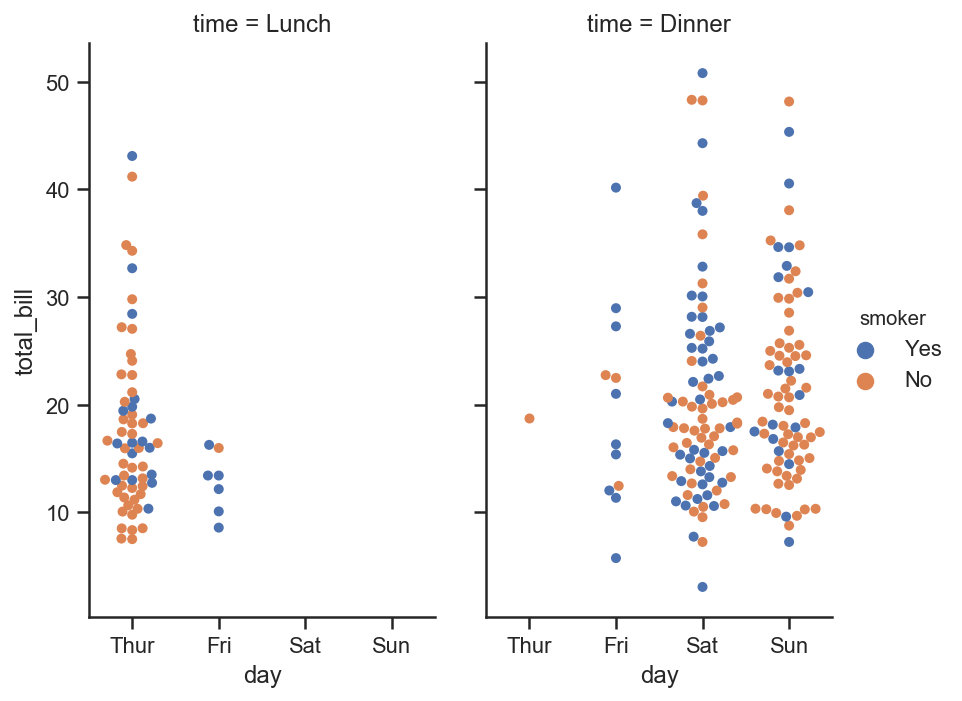

In [113]:
# 与relplot()一样，calplot()也是基于FacetGrid构建，这意味着我们可以轻易地通过更多子图来表现高维的关系：
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

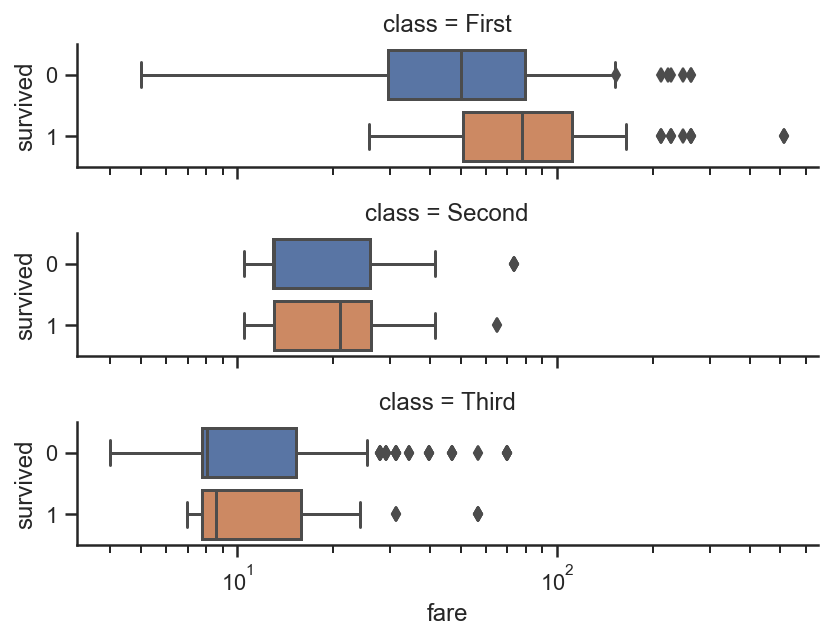

In [114]:
#当我们想要定制更多细节时，我们就需要使用FacetGrid对象支持的方法了：

g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

# 数据集的分布
上手一个数据集时，往往第一件事就是了解每个变量是如何分布的。这一章节会简单地教大家如何在seaborn中检验一元分布和二元（维）分布。

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

## 一元分布的可视化

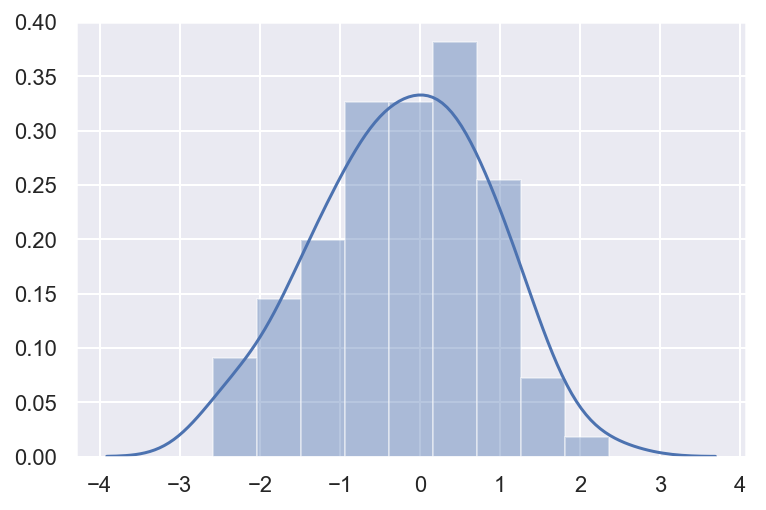

In [116]:
#在seaborn中，查看单变量分布情况最方便的方法就是使用distplot()函数。
#默认情况下，它会画一个直方图，并且做一个核密度估计（KDE）。
x = np.random.normal(size=100)
sns.distplot(x);

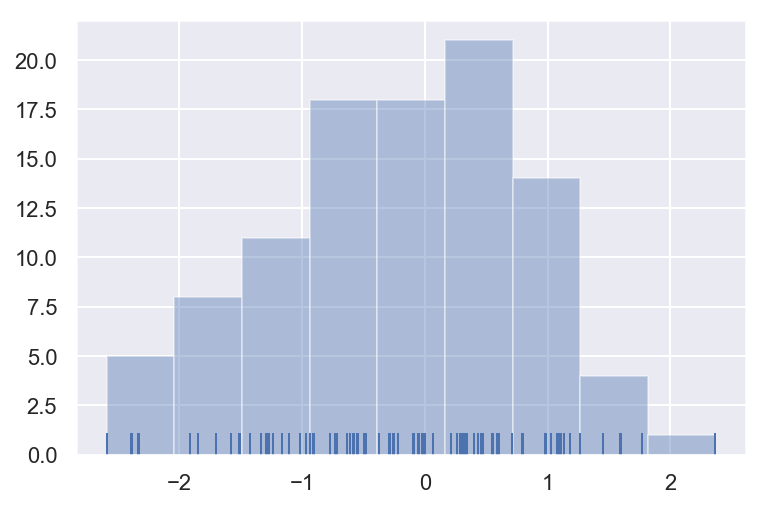

In [117]:
# 去掉密度曲线，并且加一个“地毯图”（rugplot）。地毯图会在每个观测值的位置添加一个垂直
# 的线段小标记。我们可以使用rugplot()来仅仅绘制地毯图，不过它在distplot()中已经得到了支持：
# 高度和下方标记的密集度是成正比的
sns.distplot(x, kde=False, rug=True);

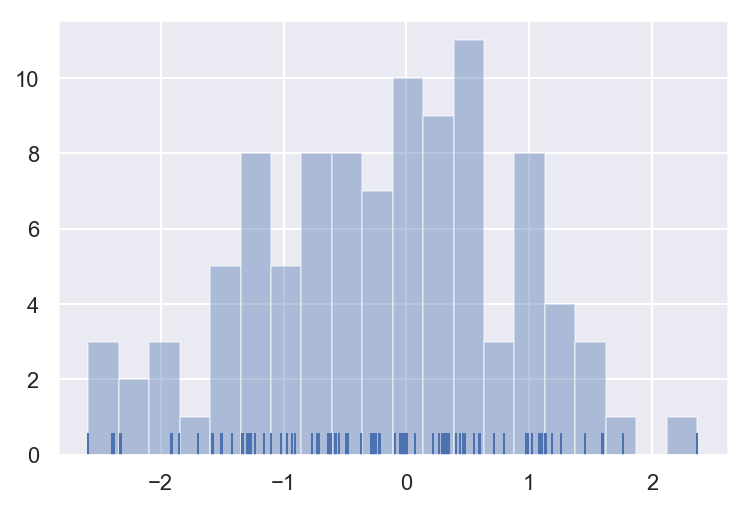

In [120]:
# 设置桶数量
sns.distplot(x, bins=20, kde=False, rug=True);

### 核密度估计

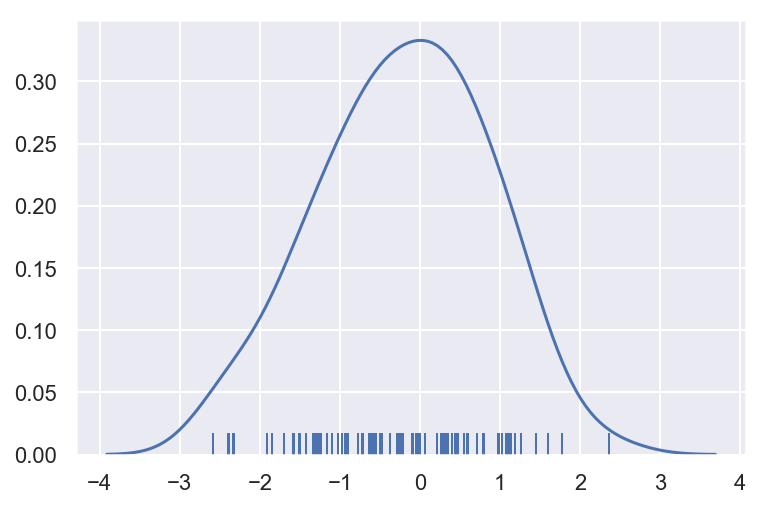

In [121]:
# 不是限制直方图，显示kde估计
sns.distplot(x, hist=False, rug=True);


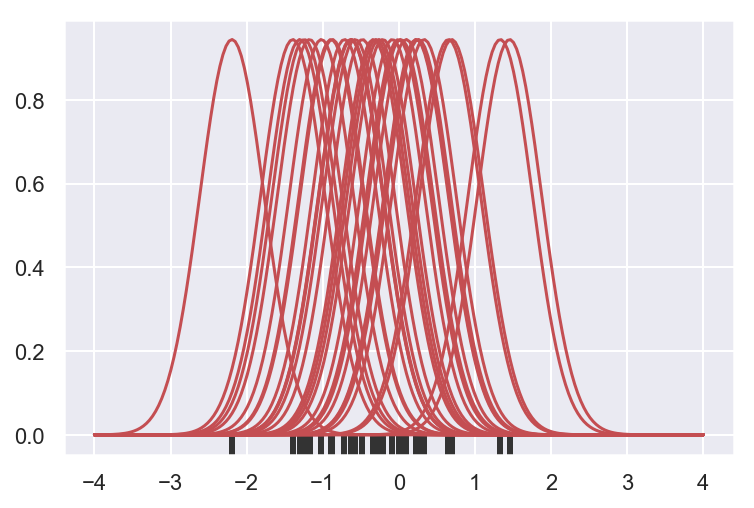

In [122]:
# 相对于直方图，KDE图的绘制有更高的计算复杂度。在KDE的计算中，
#首先每个观测值会被替换为一条以该观测点为中心的正态曲线：
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')

sns.rugplot(x, color=".2", linewidth=3);

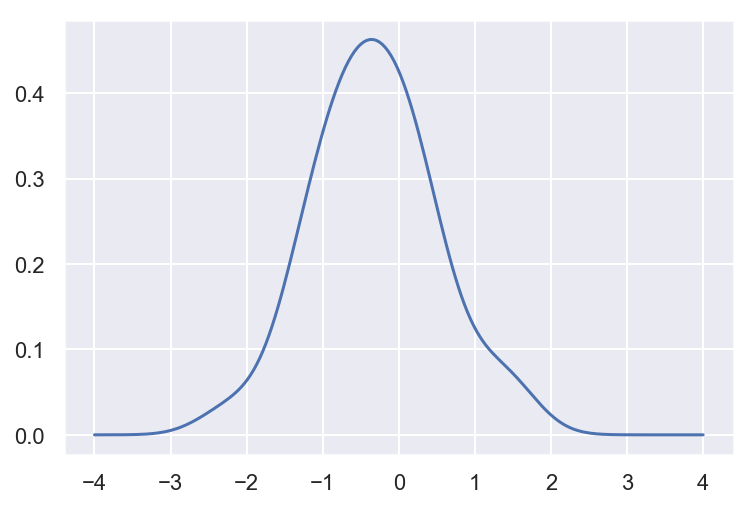

In [123]:
# 接下来，我们把所有的曲线都叠加起来，得到每个点上的密度。然后我们把最终的曲线正则化
#（归一化），这样曲线下方的面积加起来刚好是1：
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

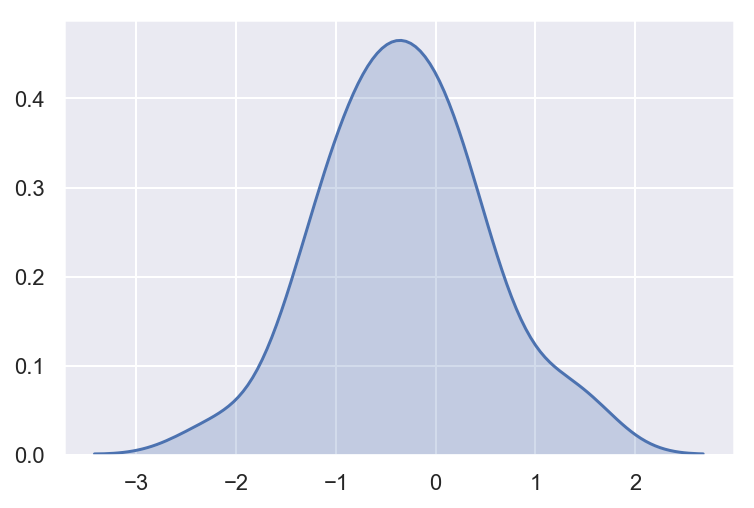

In [124]:
# 直接用kdeplot()函数，那我们会得到同样的结果。distplot()中集成了这个函数，
#但是当我们只想绘制密度估计图时，kdeplot()能提供更直接的接口以及更多的选项。
sns.kdeplot(x, shade=True);


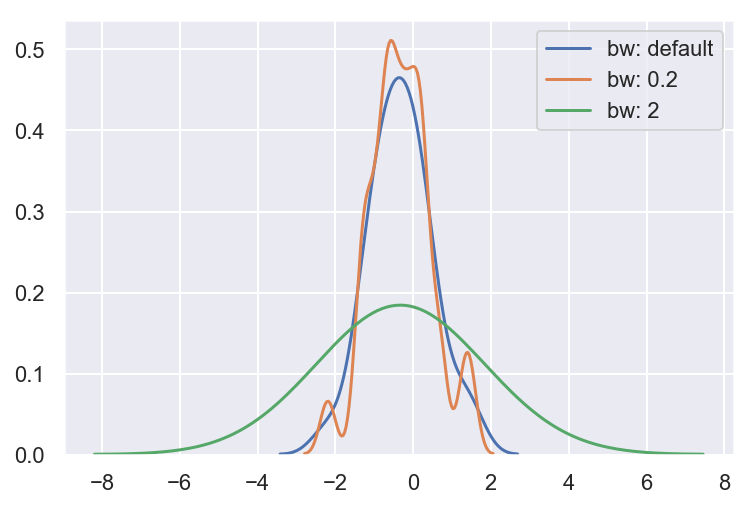

In [125]:
# 
'''
kdeplot()中的bw参数控制着估计值与真实数据之间的贴近程度，就像直方图中的分桶大小一样。
它与我们的KDE图的宽度相关。它提供了默认的规则来确定一个取值，不过有些时候我们自己尝试一
些更大或更小的值也许会很有帮助：
'''
sns.kdeplot(x, label="bw: default")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

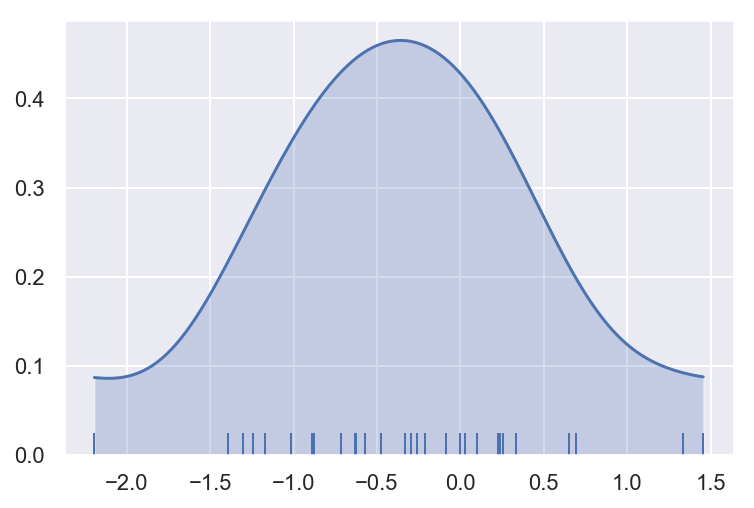

In [126]:
#
'''
如你所见，高斯（正态）KDE过程的性质扩展了原数据集中的最大值和最小值。我们可以通过cut参数
控制曲线超过极值的距离，然而这只会改变曲线的绘制，而不会改变它拟合、计算的过程：
'''
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

### 拟合指定的分布

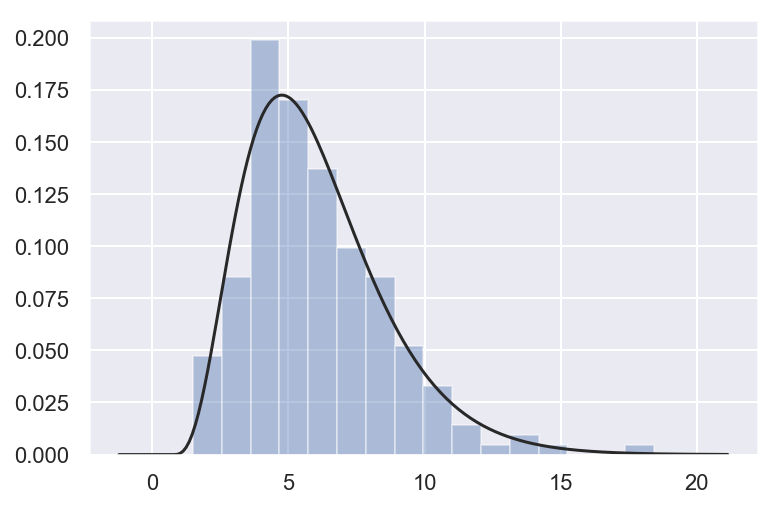

In [127]:
#我们可以使用distplot()将数据拟合到一个指定的分布形态，我们可以在视觉上评估它们有多接近：
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

## 二元分布可视化
将两个变量的联合分布形态可视化出来往往会很有用。在seaborn中，最简单的实现方式是使用jointplot()函数，它会生成多个面板，不仅展示了两个变量之间的关系，也在两个坐标轴上分别展示了每个变量的分布。

In [129]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### 散点图

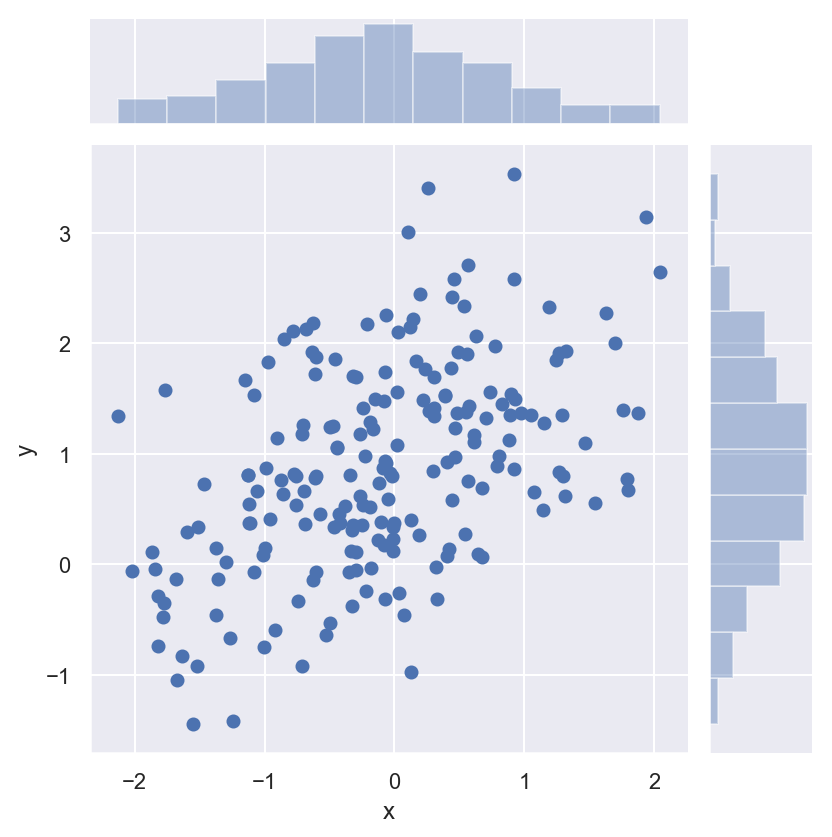

In [130]:
#默认
sns.jointplot(x="x", y="y", data=df);


### 六边图

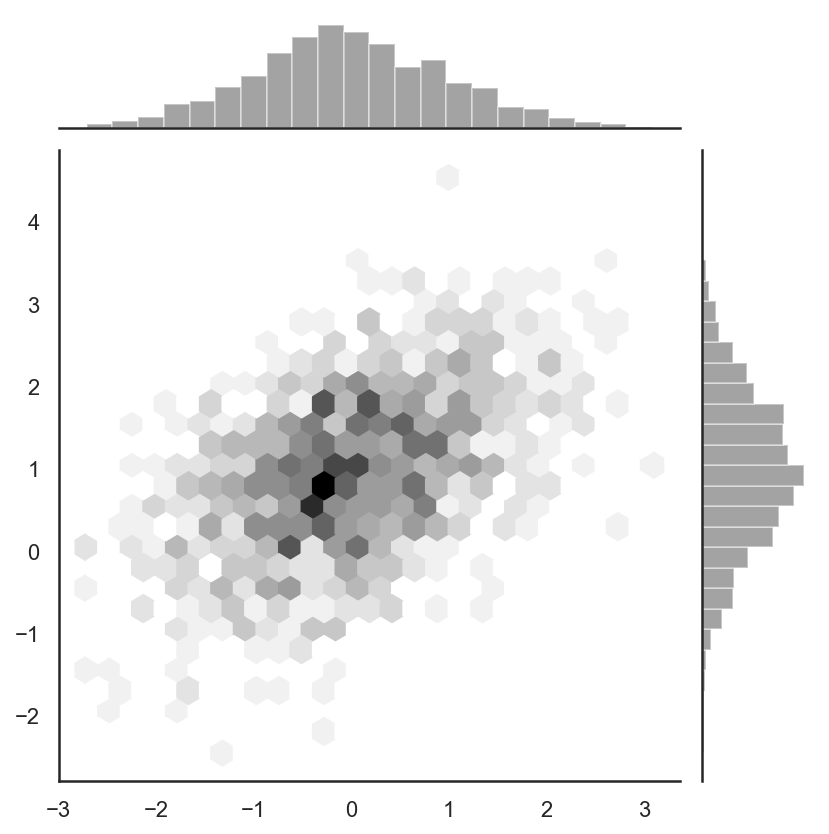

In [131]:
'''
六边图（Hexbin），可以视为二维世界中的直方图，因为它展示了每个小六边形中观测点的数量。
这种图在大数据集上表现最佳。我们使用matplotlib的plt.hexbin函数以及
seaborn的jointplot(kind="hex")都可以绘制它。白色背景与六边图看起来更配哦：
'''
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

### 核密度估计

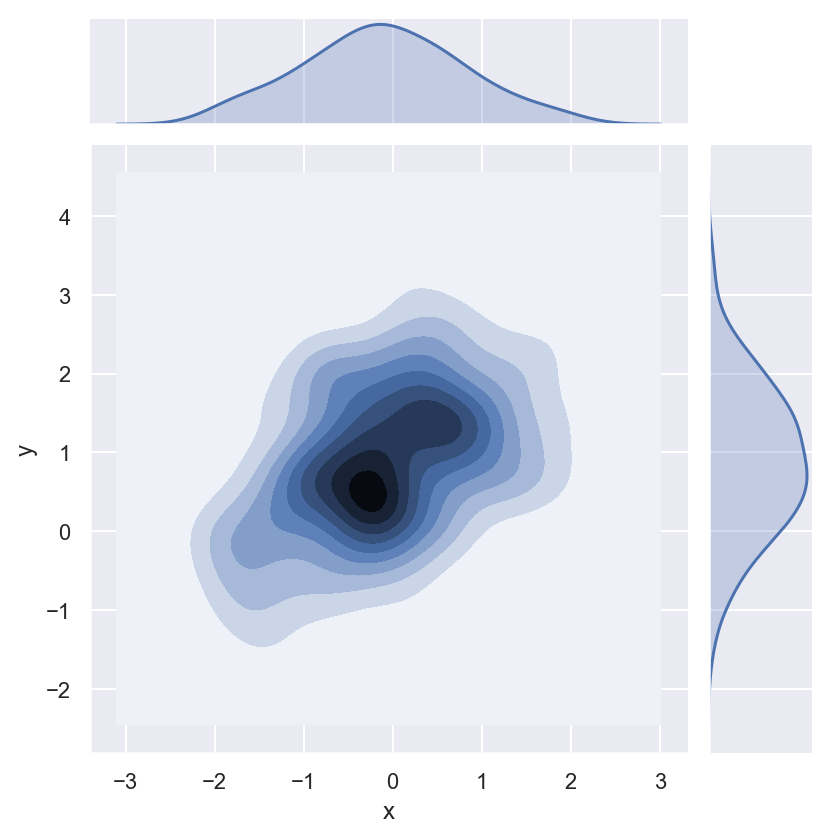

In [132]:
# 核密度估计也适用于二元的情况。在seaborn中，这种图会以等高线的方式展示出来，我们可以用jointplot(kind="kde")来绘制它：
sns.jointplot(x="x", y="y", data=df, kind="kde");

可以直接使用kdeplot()来绘制二维的核密度估计图。这允许我们直接在某个指定的matplotlib坐标轴上（包括已存在的坐标轴体系）绘制这类图形。作为对比，在jointplot()中我们只能创建一个新的图来生成核密度估计图。

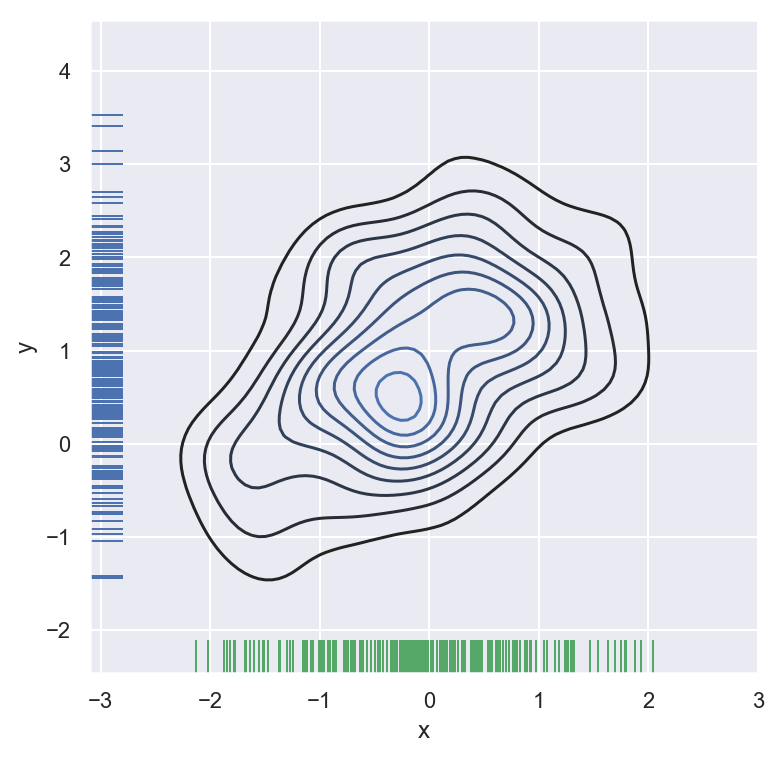

In [134]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

如果我们想将二元密度以更加连续的形式展示出来，我们可以简单地通过增加等高线的水平数：

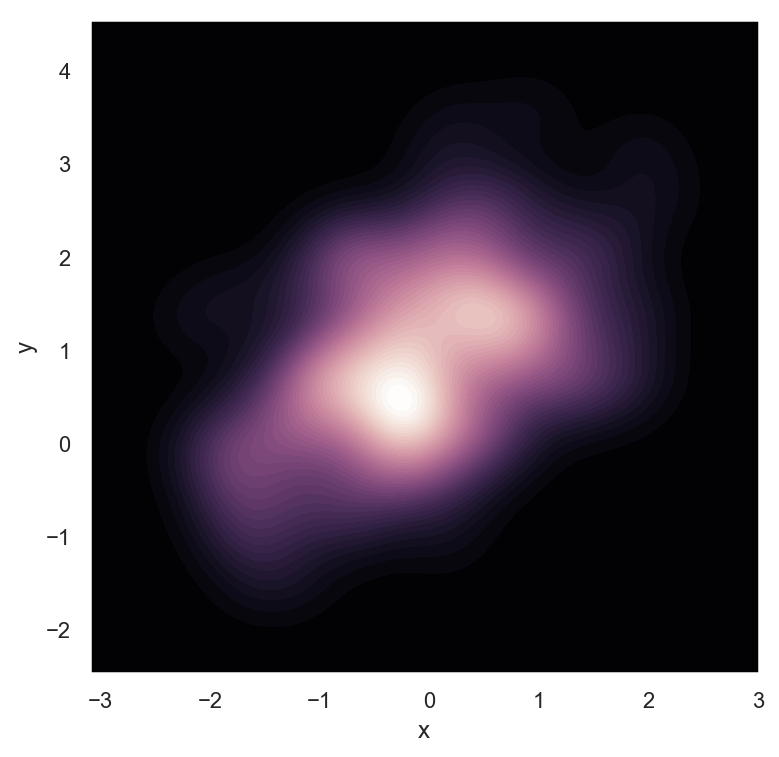

In [135]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

jointplot()函数基于JointGrid对象来控制图形。我们可以直接使用JointGrid来获得更高的灵活性。jointplot()在绘制完成后会返回一个JointGrid对象，我们可以通过它来增加更多图层或者调整其他细节：

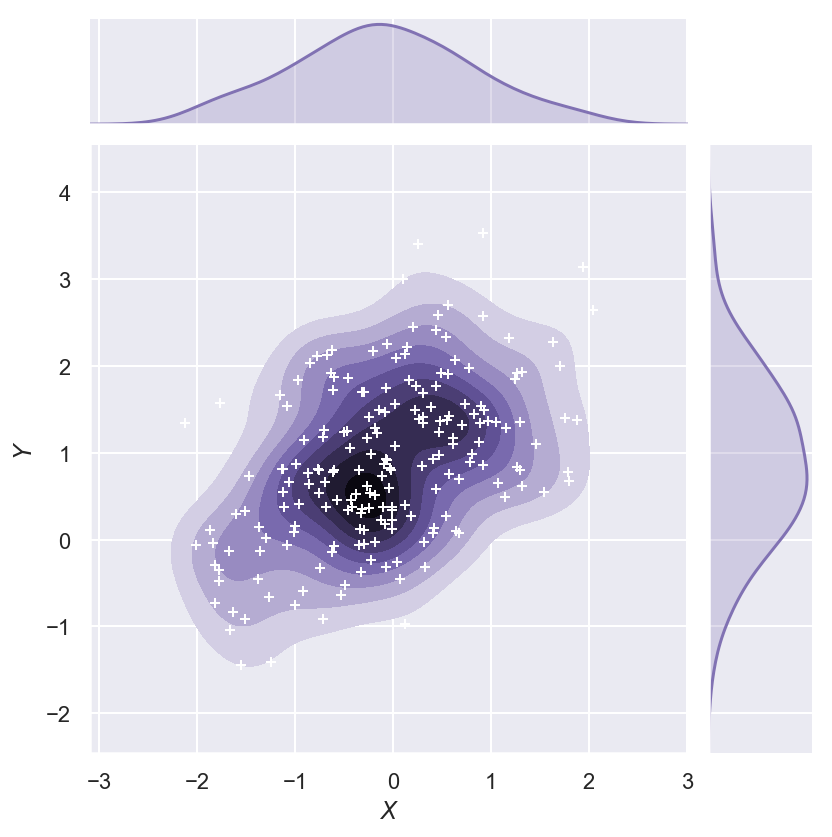

In [136]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## 数据集中成对关系的可视化
成对关系的可视化是指在一个数据集的所有变量中，两两之间的关系。假如我们想要看多个变量中两两组合之间的联合分布情况，我们可以使用pairplot()函数，它会创建一个由多个坐标轴构成的矩阵，然后把两两之间（一般是DataFrame的列之间的组合）的关系分别绘制在不同的坐标轴上去。默认情况下，它还会将每个变量自己的分布情况画在对角线的位置：

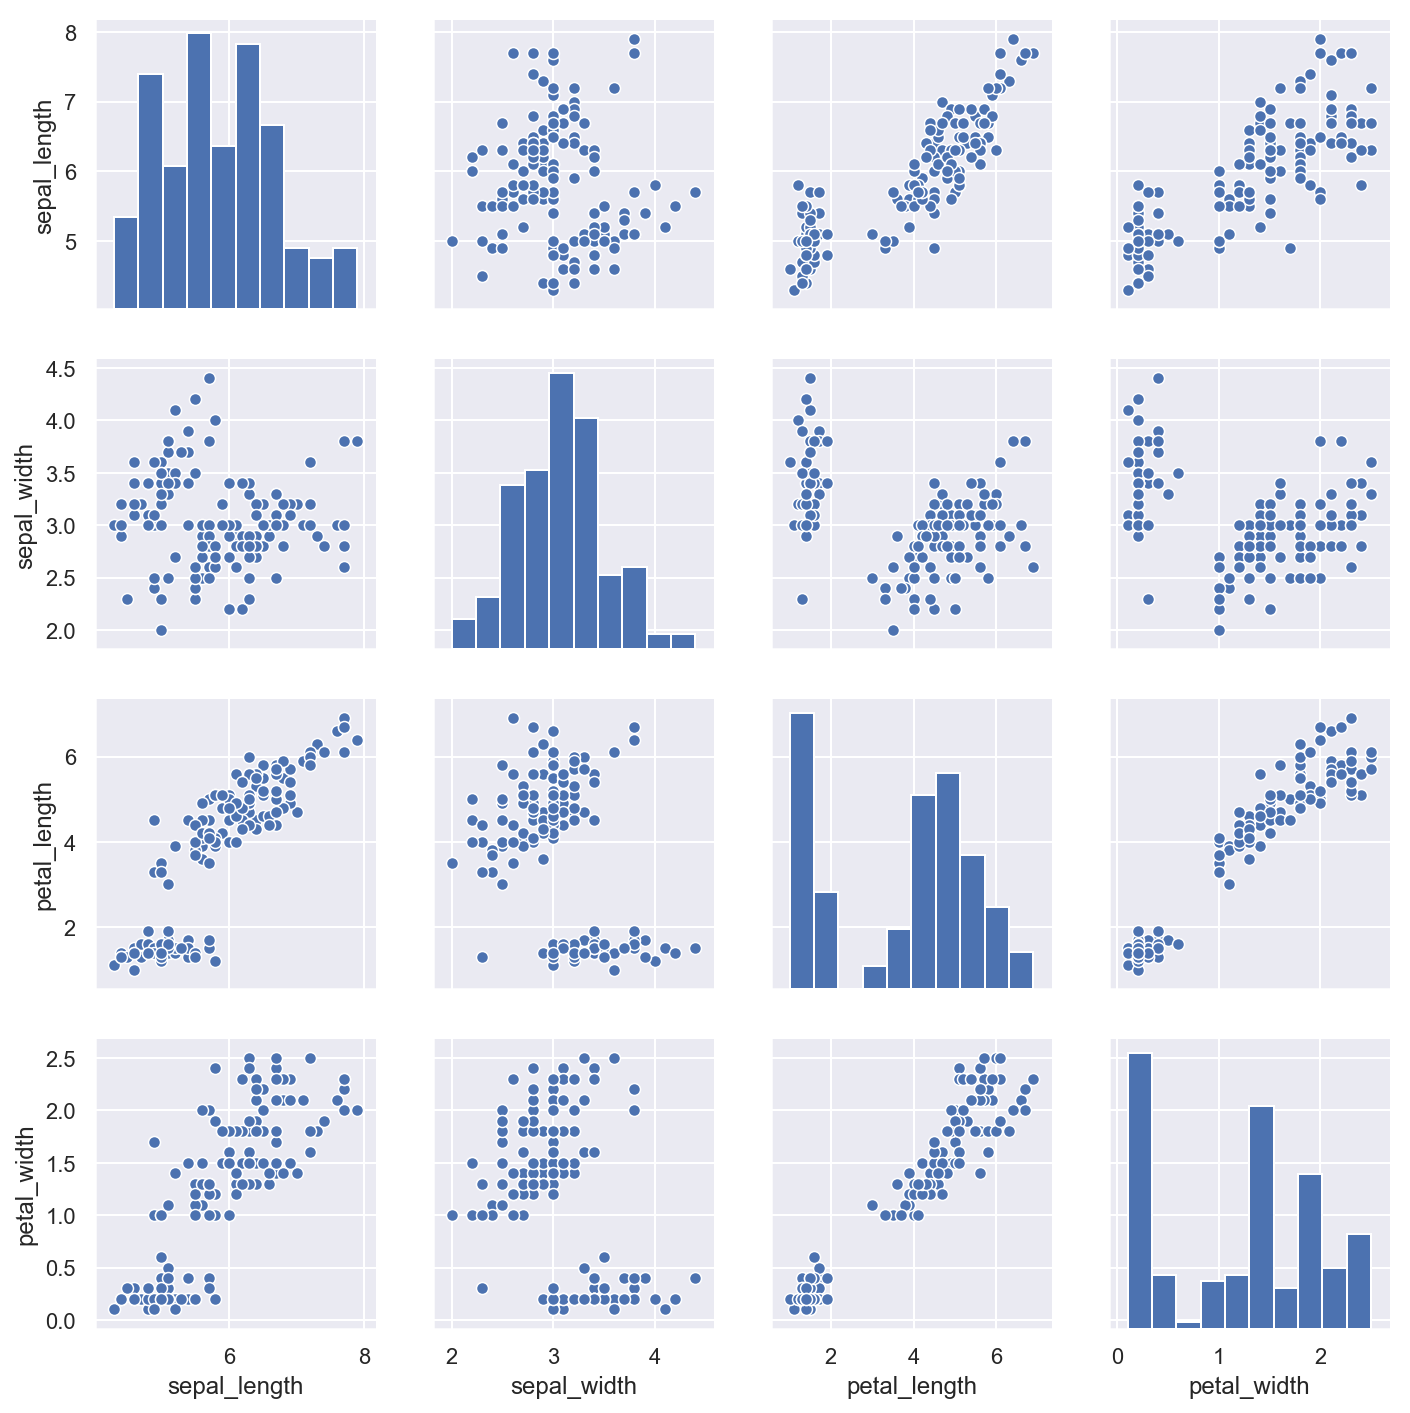

In [137]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

正如jointplot()函数和JointGrid对象之间的关系，pairplot()函数是基于PairGrid对象构建的，我们也可以使用PairGrid来获取更多灵活性：

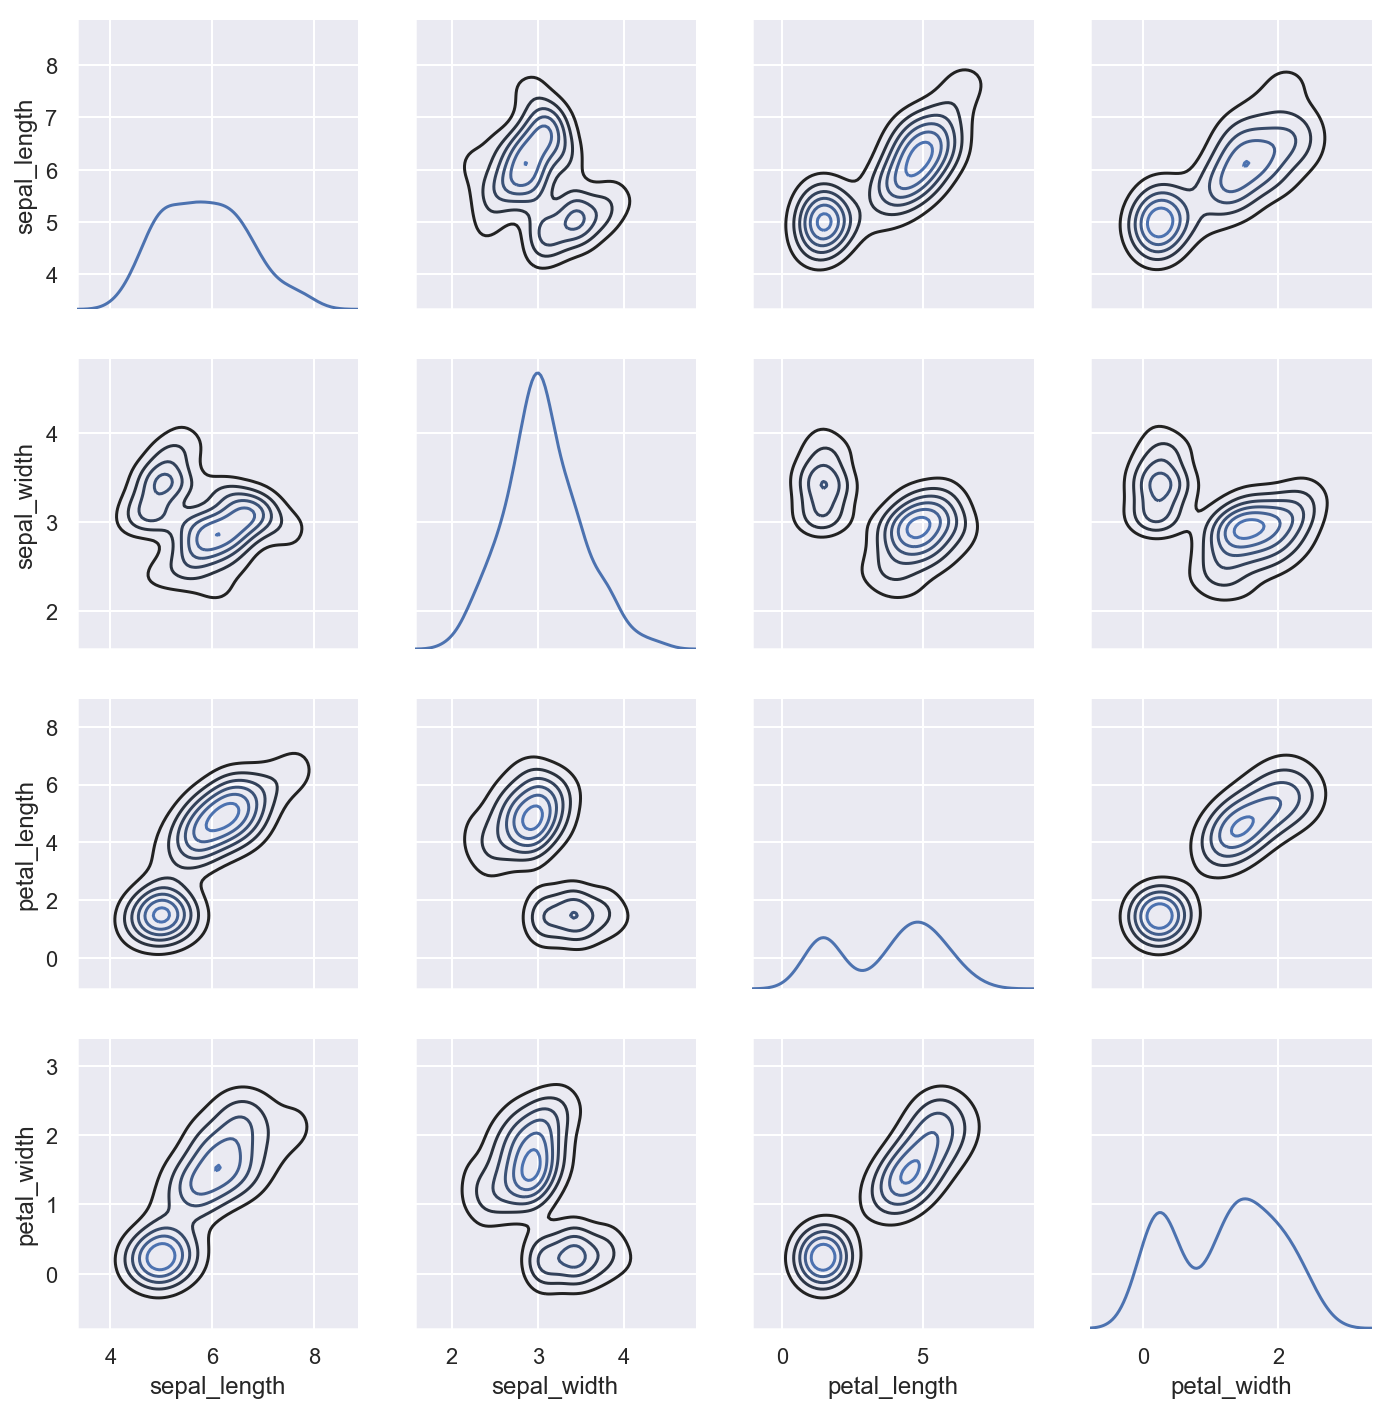

In [138]:
g = sns.PairGrid(iris)
# 在对角线上的坐标轴内画图
g.map_diag(sns.kdeplot)
# 在非对角线上的坐标轴内画图
g.map_offdiag(sns.kdeplot, n_levels=6);

# 线性关系的展示
许多数据集含有多个定量变量（数值型变量），而我们分析的目的往往是将他们关联起来。我们曾讨论过通过两个变量的联合分布来实现这一点。然而，使用统计模型来为两组带有噪声数据的观测值评估出一个简单的关系可以是非常有用的。这一章节我们讨论的函数将会在线性回归的框架下实现这种预测。
seaborn中的回归图主要是为了在EDA（探索数据分析）阶段为发掘数据中存在的规律提供一些视觉指引，也就是说，seaborn本身并非是一个用于统计分析的库。想要得到关于回归模型拟合效果的一些量化指标，你需要使用statsmodels库。seaborn的终极目标就是让我们通过可视化快速、轻易地探索数据，毕竟对于探索数据来说，可视化的重要性不比得到一个统计表格低。

In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

## 绘制线性回归模型
seaborn主要通过两个函数来展示通过回归得到的线性关系，regplot()和lmplot()。它们紧密相关，而且共享大多数的核心功能。但是弄清楚他们的区别非常重要，这样我们就可以在针对特定工作时快速判断哪个工具更适合。
在最基本的调用过程中，他们都会画出关于x、y两个变量的散点图，同时用数据拟合一个y ~ x的模型出来，并将对应的直线和95%的置信区间绘制出来：

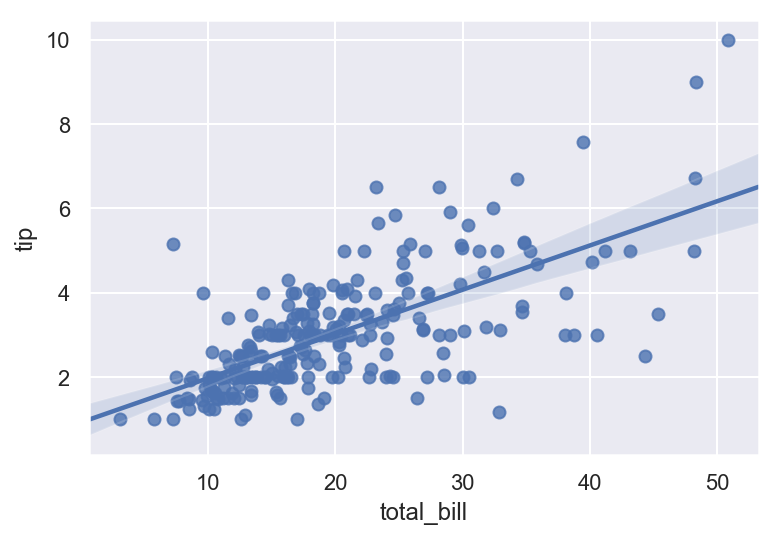

In [140]:
sns.regplot(x="total_bill", y="tip", data=tips);

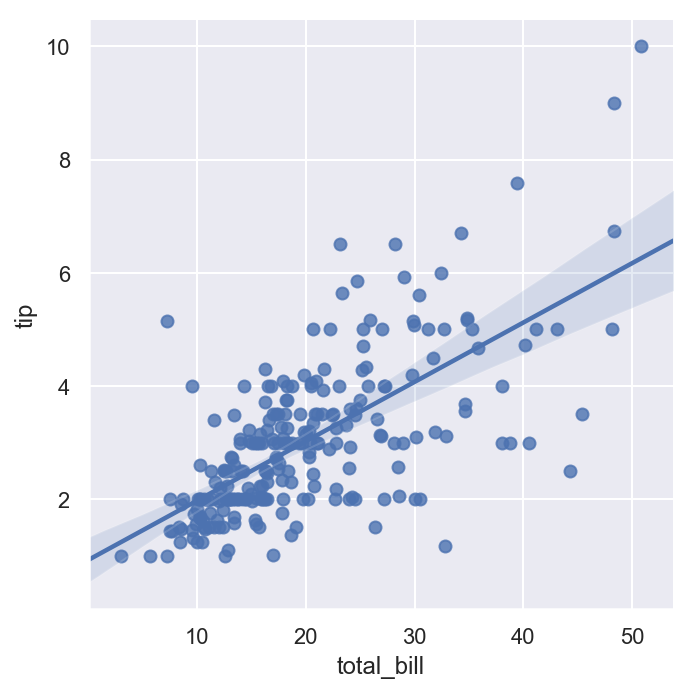

In [141]:
sns.lmplot(x="total_bill", y="tip", data=tips);

我们注意到除了图片的形状略有差异，其他地方都是一致的。需要知道的是，他们之间最主要的区别在于regplot()中的x, y参数接受多种数据类型，包括numpy数组、pandas序列（Series），或者将pandas DataFrame传递给data参数。作为对比，lmplot()的data参数是不能为空的，同时x和y参数必须以字符串形式指定。这种数据格式（这里是指regplot()支持而lmplot()不支持的类似一维数组的数据格式）被称为“long-form data”或“tidy data”。除了这一输入格式的灵活性以外，regplot()仅提供了lmplot()特性的一部分，所以我们用后者来演示它们的使用。
seaborn支持其中一个变量属于离散变量的情况，不过这种数据集产生的散点图效果往往一般：

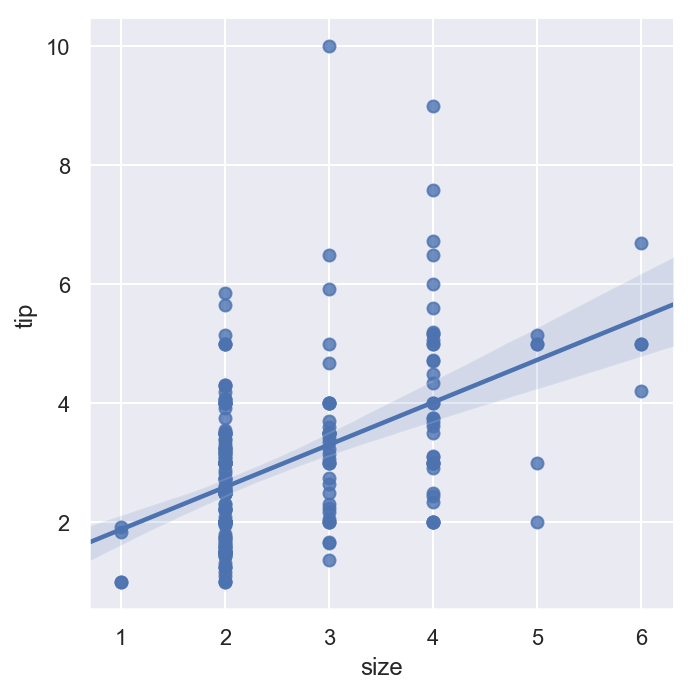

In [142]:
sns.lmplot(x="size", y="tip", data=tips);

增加一些随机的偏移量会让这些分布看起来更清晰，需要注意的是这些偏移量仅仅会影响散点图的效果，不会对拟合的回归线产生干扰：

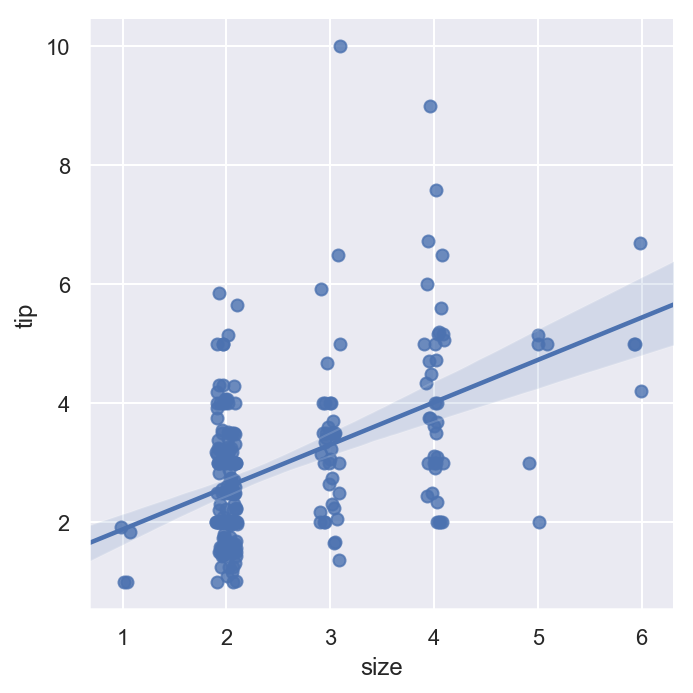

In [144]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.1);
